In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.regression.quantile_regression import QuantReg

trees = pd.read_excel("C:\Users\heid4253\Documents\FinalProject\ProjecttreesCleanX.xlsx")
trees.head()

Stand_ID  Latitude  Longitude     Rock_Type  Ash_Code  StandBA  StandQMD  \
0  45_510942   47.5803   -116.280  Metasediment  NonAndic   234.52    2.0736   
1  24_213935   45.1997   -118.540     Extrusive  NonAndic   112.19    1.4384   
2  24_220620   46.9217   -121.130     Extrusive  AshInflu   131.46    1.5616   
3  24_111633   44.6467   -118.893   Sedimentary  NonAndic    84.14    1.2677   
4  24_207621   43.7195   -121.096     Extrusive   Andisol    90.86    1.3195   

          SDI        SDI_m     lnQMD       ...        tan_slope  cos_aspect  \
0  800.467308  1977.994742  0.729286       ...             0.27   -0.573576   
1  442.488600  1093.411456  0.363531       ...             0.05    0.500000   
2  501.872976  1240.153218  0.445711       ...             0.22   -0.999848   
3  348.816013   861.941809  0.237204       ...             0.20    0.615661   
4  370.762236   916.172024  0.277253       ...             0.05   -0.999391   

   tan_slope_cos_aspect  sin_aspect  tan_slope_sin_aspect  DF_BA_FRACT  \
0             -0.154866    0.819152              0.221171      0.00000   
1              0.025000   -0.866025             -0.043301      0.18401   
2             -0.219966    0.017452              0.003840      0.21670   
3              0.123132    0.788011              0.157602      0.21098   
4             -0.049970    0.034899              0.001745      0.00000   

   GF_BA_FRACT  PP_BA_FRACT  WL_BA_FRACT  Other_BA_FRACT  
0      0.47445      0.00000      0.00000         0.52555  
1      0.58141      0.00001      0.14516         0.08941  
2      0.13149      0.00000      0.13797         0.51384  
3      0.47165      0.04678      0.14297         0.12762  
4      0.00000      0.97332      0.00000         0.02668  

[5 rows x 42 columns]

Text(0,0.5,'lnTPA')

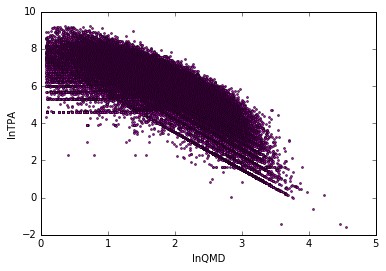

In [10]:
a=trees.lnQMD
b=trees.lnTPA
plt.plot(a, b, 'o', color='m', markersize=2)
plt.xlabel('lnQMD')
plt.ylabel('lnTPA')

In [18]:
trees.shape

(92386, 42)

In [13]:
trees.dtypes

Stand_ID                 object
Latitude                float64
Longitude               float64
Rock_Type                object
Ash_Code                 object
StandBA                 float64
StandQMD                float64
SDI                     float64
SDI_m                   float64
lnQMD                   float64
QMDcm                   float64
lnQMDcm                 float64
StandTPA                float64
lnTPA                   float64
StandTPH                float64
lnTPH                   float64
Aspect                    int64
Slope                     int64
elev_ft                 float64
mat                     float64
map                       int64
gsp                       int64
mtcm                    float64
mtwm                    float64
ffp                       int64
dd5                       int64
gsdd5                     int64
d100                      int64
dd0                       int64
smrsprpb                float64
sdi                     float64
adi     

## Exploratory Data Analysis

First, look at the distribution of some important variables

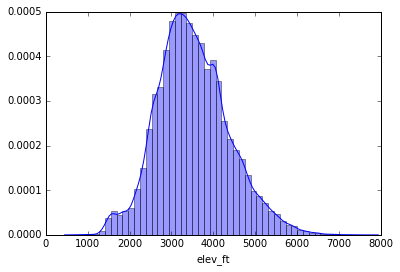

In [63]:
sns.distplot(trees.elev_ft)

In [64]:
trees.elev_ft.describe()

count    92386.000000
mean      3518.516149
std        855.031735
min        715.220000
25%       2936.350000
50%       3448.160000
75%       4049.727500
max       7676.650000
Name: elev_ft, dtype: float64

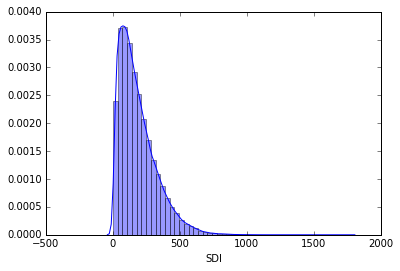

In [65]:
sns.distplot(trees.SDI)

In [66]:
trees.SDI.describe()

count    92386.000000
mean       185.059115
std        138.644832
min          0.476021
25%         80.523801
50%        151.723975
75%        256.178713
max       1764.727117
Name: SDI, dtype: float64

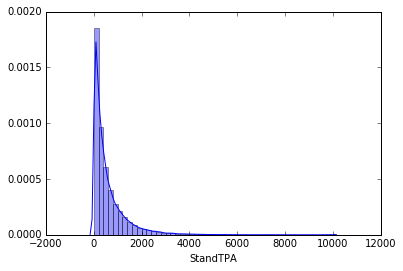

In [67]:
sns.distplot(trees.StandTPA)

In [68]:
trees.StandTPA.describe()

count    92386.000000
mean       585.755690
std        765.010983
min          0.210000
25%        115.560000
50%        321.780000
75%        753.580000
max      10000.000000
Name: StandTPA, dtype: float64

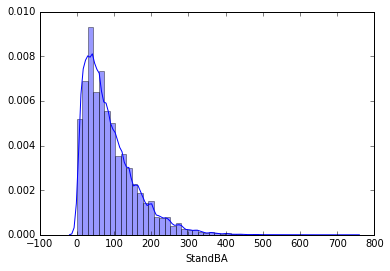

In [69]:
sns.distplot(trees.StandBA)

In [70]:
trees.StandBA.describe()

count    92386.000000
mean        88.942959
std         70.166860
min          0.120000
25%         40.000000
50%         70.000000
75%        122.050000
max        740.000000
Name: StandBA, dtype: float64

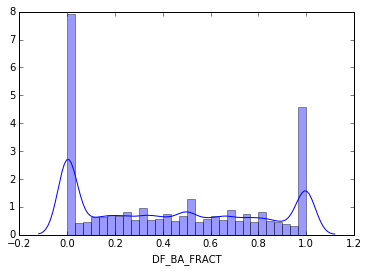

In [71]:
sns.distplot(trees.DF_BA_FRACT)

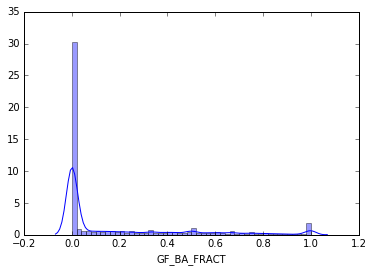

In [72]:
sns.distplot(trees.GF_BA_FRACT)

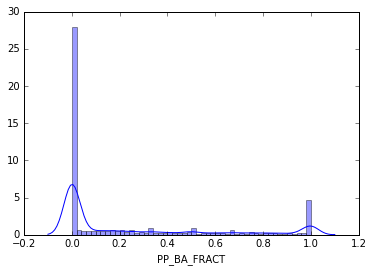

In [73]:
sns.distplot(trees.PP_BA_FRACT)

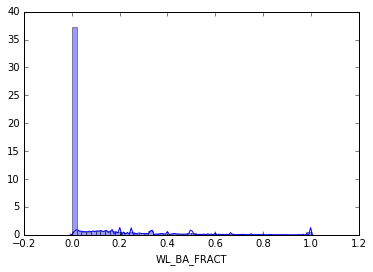

In [74]:
sns.distplot(trees.WL_BA_FRACT)

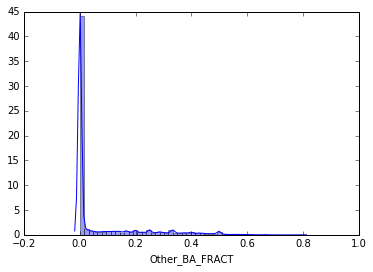

In [75]:
sns.distplot(trees.Other_BA_FRACT)

Explore the Ash and Rock codes; and the distribution of Basal Area of the 4 tree species.

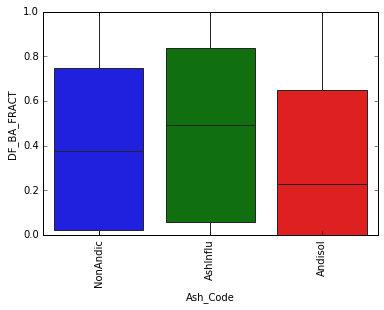

In [76]:
s=sns.boxplot(x="Ash_Code", y="DF_BA_FRACT",data=trees, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

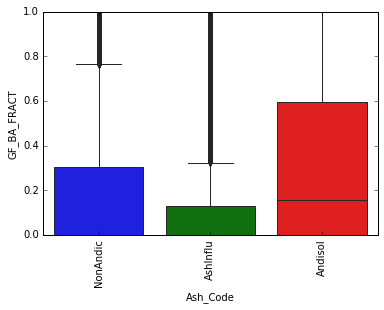

In [77]:
s=sns.boxplot(x="Ash_Code", y="GF_BA_FRACT",data=trees, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

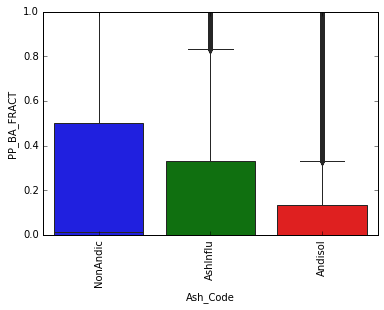

In [78]:
s=sns.boxplot(x="Ash_Code", y="PP_BA_FRACT",data=trees, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

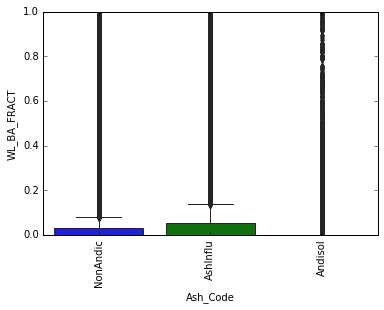

In [79]:
s=sns.boxplot(x="Ash_Code", y="WL_BA_FRACT",data=trees, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

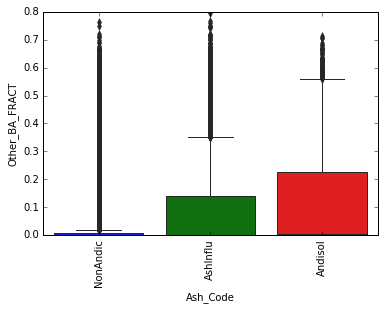

In [80]:
s=sns.boxplot(x="Ash_Code", y="Other_BA_FRACT",data=trees, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

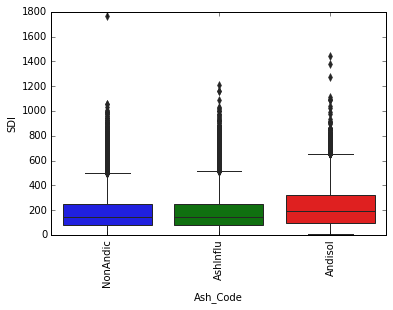

In [81]:
s=sns.boxplot(x="Ash_Code", y="SDI",data=trees, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

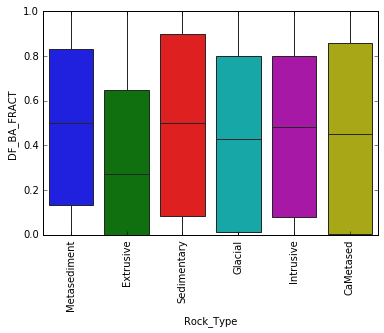

In [82]:
s=sns.boxplot(x="Rock_Type", y="DF_BA_FRACT",data=trees, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

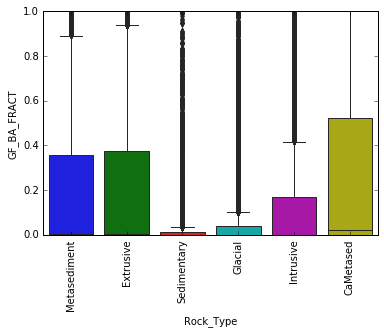

In [83]:
s=sns.boxplot(x="Rock_Type", y="GF_BA_FRACT",data=trees, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

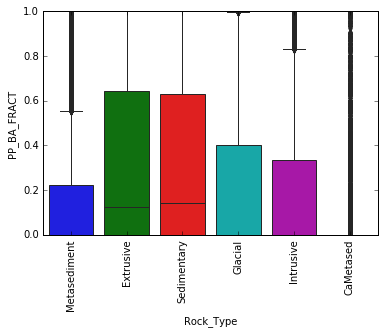

In [84]:
s=sns.boxplot(x="Rock_Type", y="PP_BA_FRACT",data=trees, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

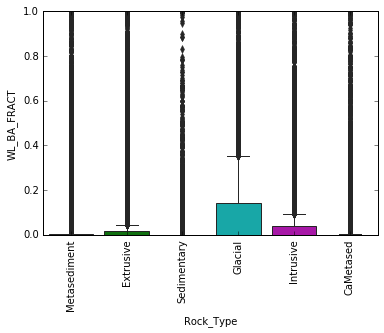

In [85]:
s=sns.boxplot(x="Rock_Type", y="WL_BA_FRACT",data=trees, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

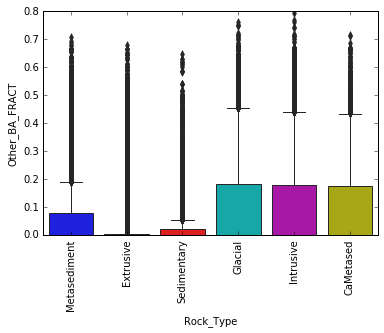

In [86]:
s=sns.boxplot(x="Rock_Type", y="Other_BA_FRACT",data=trees, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

Is there an interaction between elevation and rock type/ash code?

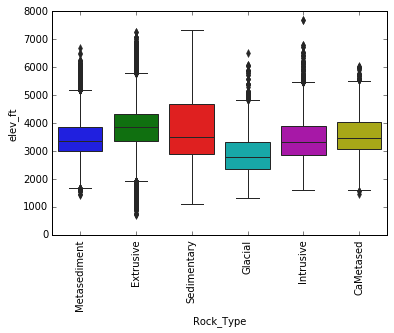

In [87]:
s=sns.boxplot(x="Rock_Type", y="elev_ft",data=trees, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

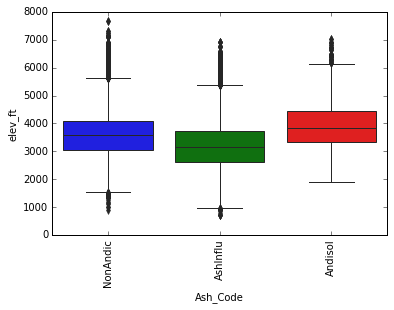

In [88]:
s=sns.boxplot(x="Ash_Code", y="elev_ft",data=trees, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

Is there an interaction between tree species basal area fraction and Rock type/Ash code?

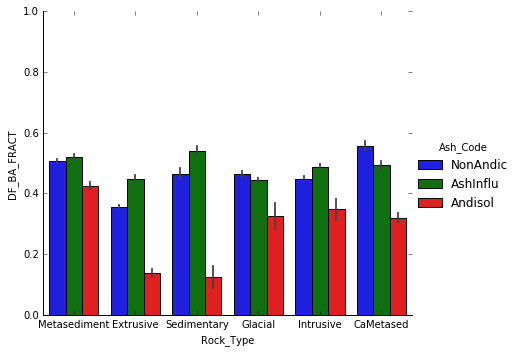

In [134]:
s=sns.catplot(x="Rock_Type", y="DF_BA_FRACT",data=trees, hue="Ash_Code", kind="bar", height=5, aspect=1.2)
s.set(ylim=(0,1))
#s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

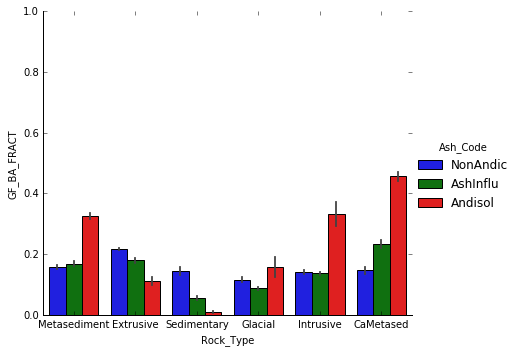

In [135]:
s=sns.catplot(x="Rock_Type", y="GF_BA_FRACT",data=trees, hue="Ash_Code", kind="bar", height=5, aspect=1.2)
s.set(ylim=(0,1))

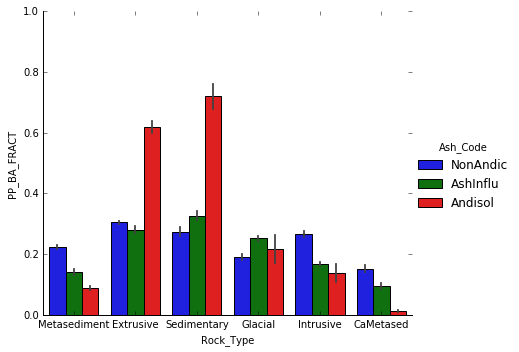

In [137]:
s=sns.catplot(x="Rock_Type", y="PP_BA_FRACT",data=trees, hue="Ash_Code", kind="bar", height=5, aspect=1.2)
s.set(ylim=(0,1))

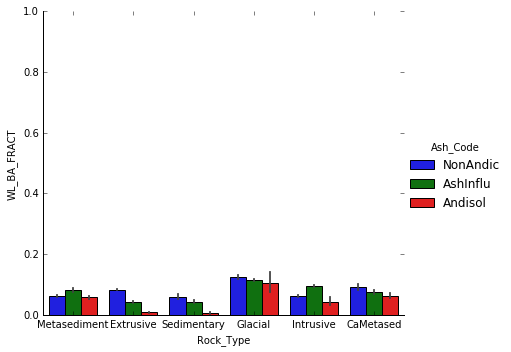

In [138]:
s=sns.catplot(x="Rock_Type", y="WL_BA_FRACT",data=trees, hue="Ash_Code", kind="bar", height=5, aspect=1.2)
s.set(ylim=(0,1))

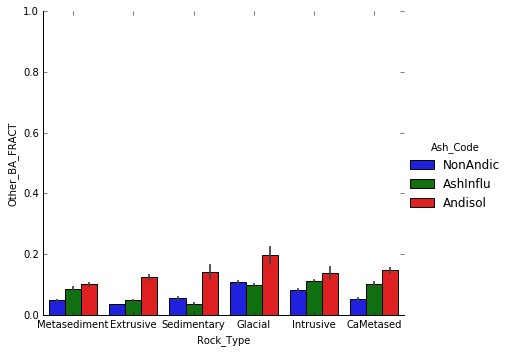

In [139]:
s=sns.catplot(x="Rock_Type", y="Other_BA_FRACT",data=trees, hue="Ash_Code", kind="bar", height=5, aspect=1.2)
s.set(ylim=(0,1))

In [94]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92386 entries, 0 to 92385
Data columns (total 42 columns):
Stand_ID                92386 non-null object
Latitude                92386 non-null float64
Longitude               92386 non-null float64
Rock_Type               92386 non-null object
Ash_Code                92386 non-null object
StandBA                 92386 non-null float64
StandQMD                92386 non-null float64
SDI                     92386 non-null float64
SDI_m                   92386 non-null float64
lnQMD                   92386 non-null float64
QMDcm                   92386 non-null float64
lnQMDcm                 92386 non-null float64
StandTPA                92386 non-null float64
lnTPA                   92386 non-null float64
StandTPH                92386 non-null float64
lnTPH                   92386 non-null float64
Aspect                  92386 non-null int64
Slope                   92386 non-null int64
elev_ft                 92386 non-null float64
mat  

In [95]:
trees.Rock_Type.unique()

array([u'Metasediment', u'Extrusive', u'Sedimentary', u'Glacial',
       u'Intrusive', u'CaMetased'], dtype=object)

In [96]:
trees.Ash_Code.unique()

array([u'NonAndic', u'AshInflu', u'Andisol'], dtype=object)

In [97]:
trees.head()

Stand_ID  Latitude  Longitude     Rock_Type  Ash_Code  StandBA  StandQMD  \
0  45_510942   47.5803   -116.280  Metasediment  NonAndic   234.52    2.0736   
1  24_213935   45.1997   -118.540     Extrusive  NonAndic   112.19    1.4384   
2  24_220620   46.9217   -121.130     Extrusive  AshInflu   131.46    1.5616   
3  24_111633   44.6467   -118.893   Sedimentary  NonAndic    84.14    1.2677   
4  24_207621   43.7195   -121.096     Extrusive   Andisol    90.86    1.3195   

          SDI        SDI_m     lnQMD       ...        tan_slope  cos_aspect  \
0  800.467308  1977.994742  0.729286       ...             0.27   -0.573576   
1  442.488600  1093.411456  0.363531       ...             0.05    0.500000   
2  501.872976  1240.153218  0.445711       ...             0.22   -0.999848   
3  348.816013   861.941809  0.237204       ...             0.20    0.615661   
4  370.762236   916.172024  0.277253       ...             0.05   -0.999391   

   tan_slope_cos_aspect  sin_aspect  tan_slope_sin_aspect  DF_BA_FRACT  \
0             -0.154866    0.819152              0.221171      0.00000   
1              0.025000   -0.866025             -0.043301      0.18401   
2             -0.219966    0.017452              0.003840      0.21670   
3              0.123132    0.788011              0.157602      0.21098   
4             -0.049970    0.034899              0.001745      0.00000   

   GF_BA_FRACT  PP_BA_FRACT  WL_BA_FRACT  Other_BA_FRACT  
0      0.47445      0.00000      0.00000         0.52555  
1      0.58141      0.00001      0.14516         0.08941  
2      0.13149      0.00000      0.13797         0.51384  
3      0.47165      0.04678      0.14297         0.12762  
4      0.00000      0.97332      0.00000         0.02668  

[5 rows x 42 columns]

Explore interactions of variables using pair plot and heat map

In [ ]:
pptrees=sns.pairplot(trees)
pptrees.savefig("pptrees.png")

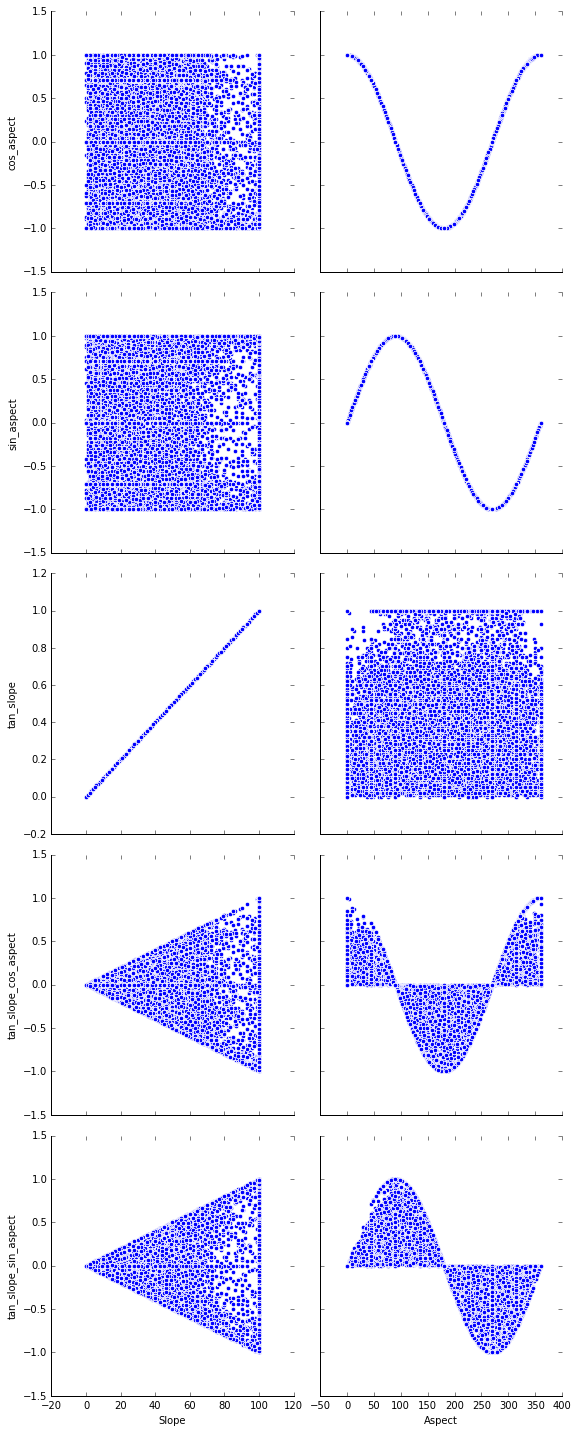

In [6]:
sns.pairplot(trees, x_vars=["Slope","Aspect"], y_vars=["cos_aspect","sin_aspect","tan_slope","tan_slope_cos_aspect","tan_slope_sin_aspect"],height=4)
#fig.savefig("original.jpeg")

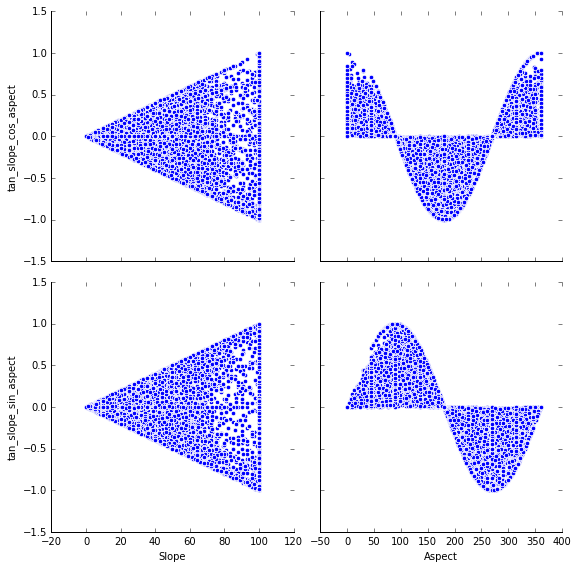

In [143]:
sns.pairplot(trees, x_vars=["Slope","Aspect"], y_vars=["tan_slope_cos_aspect","tan_slope_sin_aspect"],height=4) #,"tan_slope_cos_aspect","tan_slope_sin_aspect"

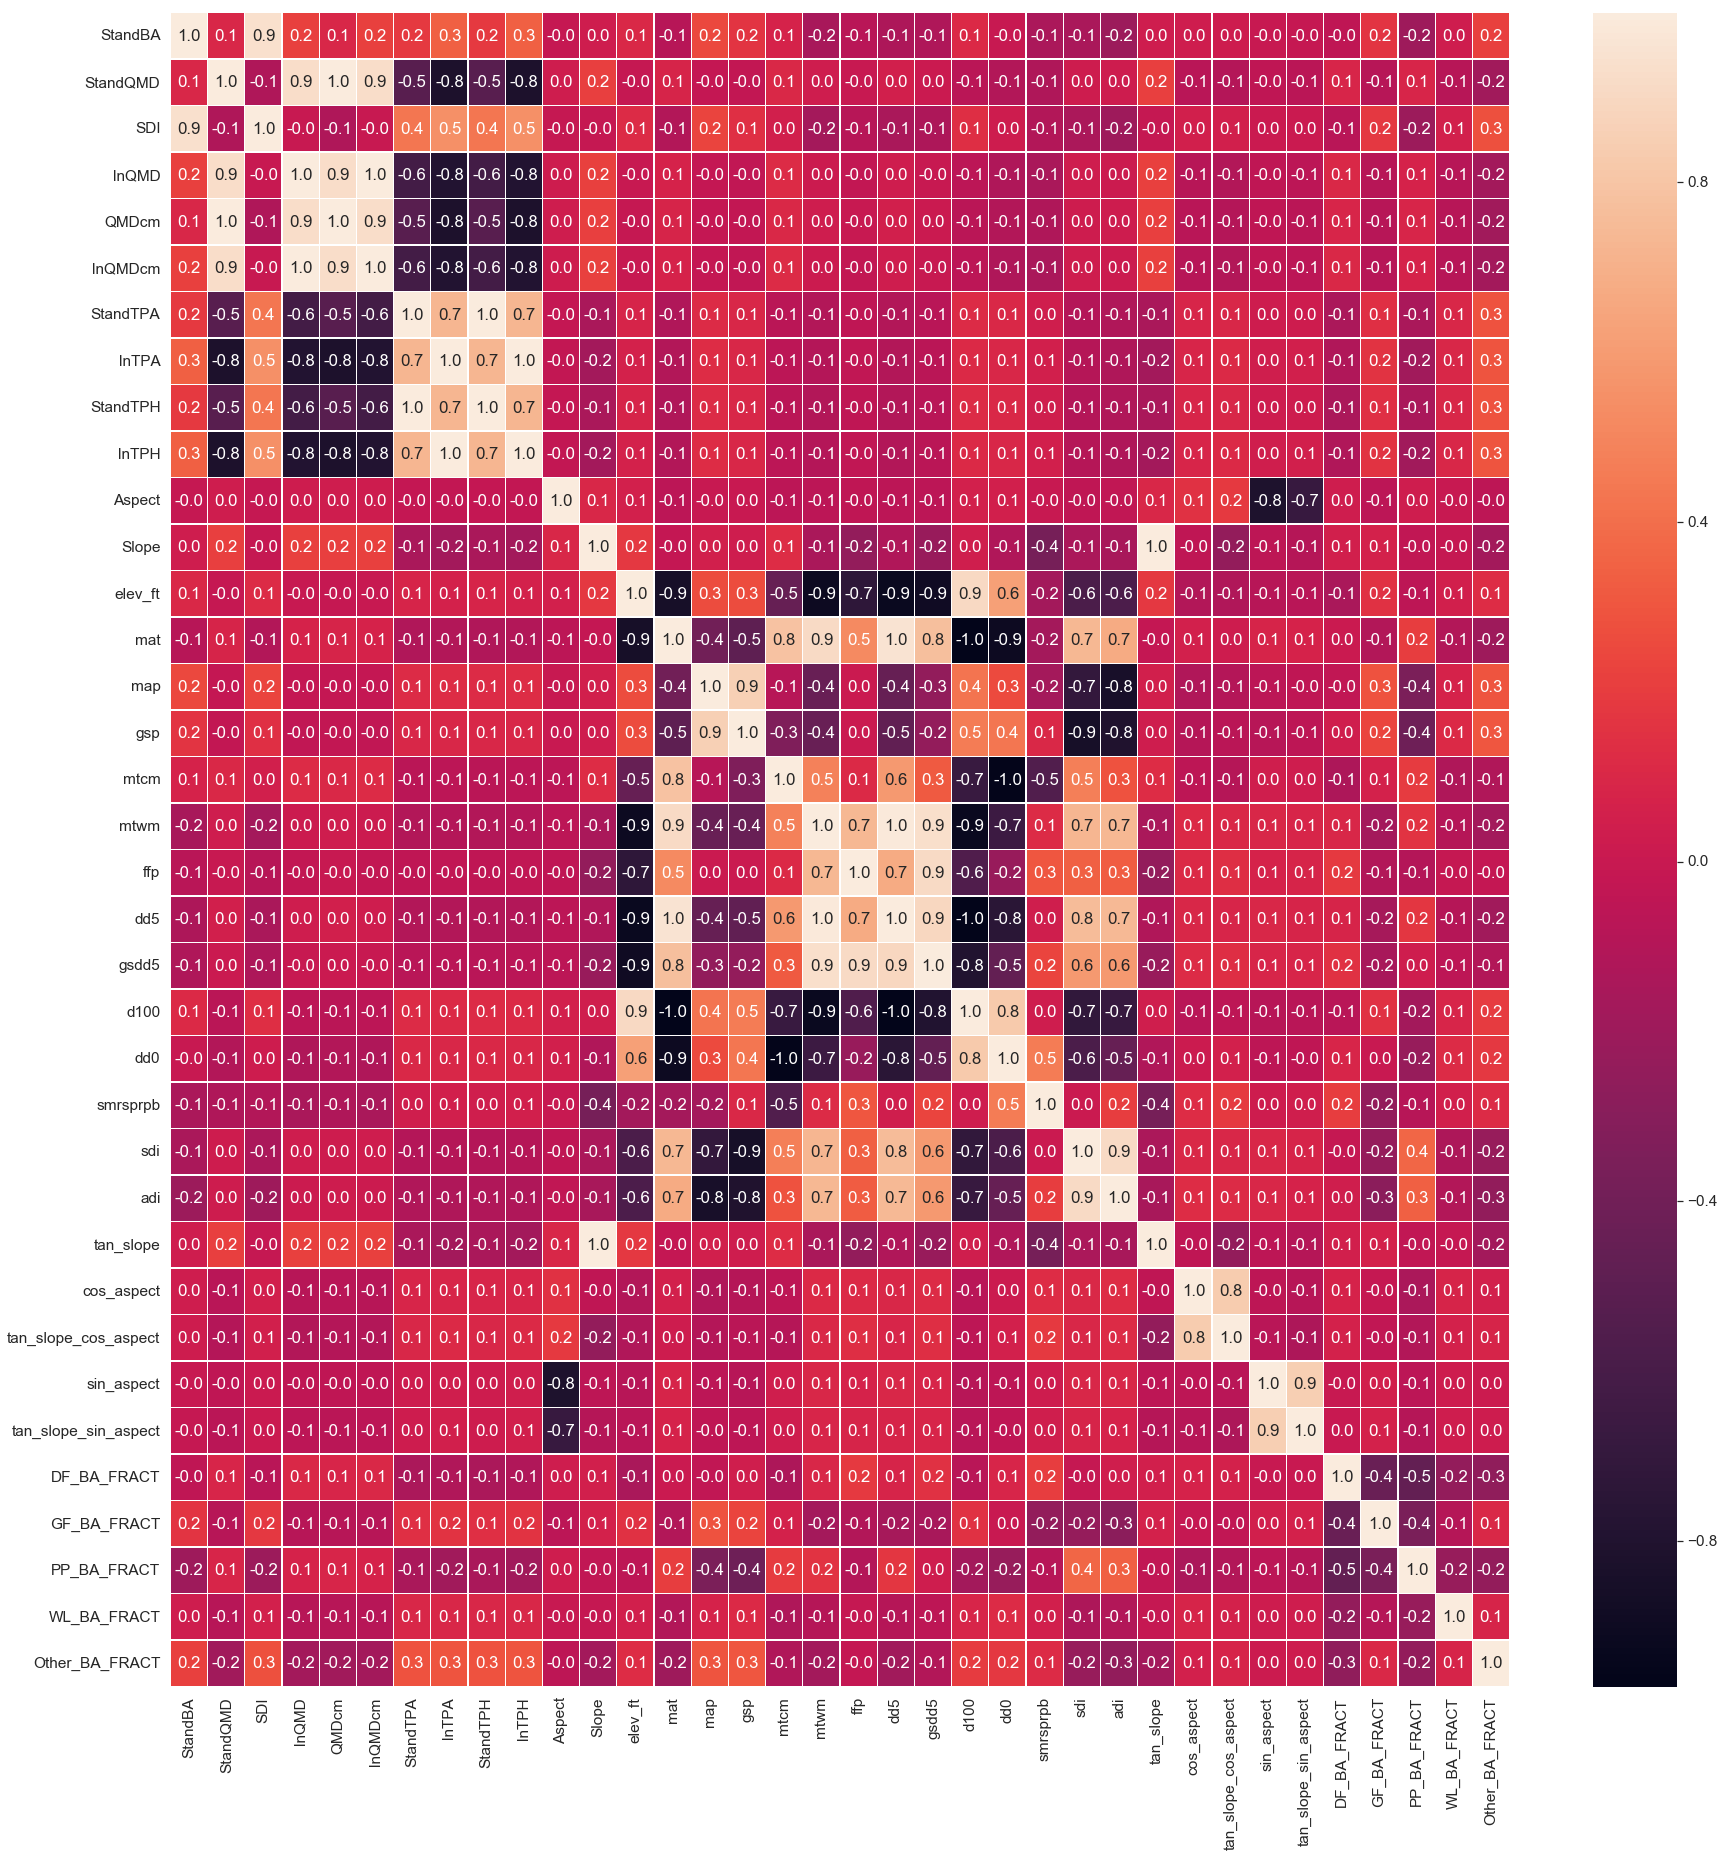

In [8]:
sns.set(font_scale=1.4)
df=trees.loc[:, 'StandBA':'Other_BA_FRACT']
f,ax = plt.subplots(figsize=(30, 30))
sns.heatmap(data=df.corr(),annot=True, linewidths=.25, fmt= '.1f',ax=ax)
plt.show()

Visualize some basic regressions on variables of interest

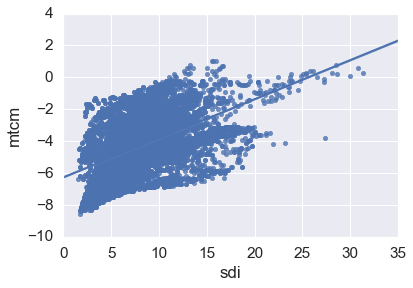

In [8]:
sns.regplot(x="sdi", y='mtcm', data=trees)

Negative relationship between elevation and mean annual temperature. Nor surprise.

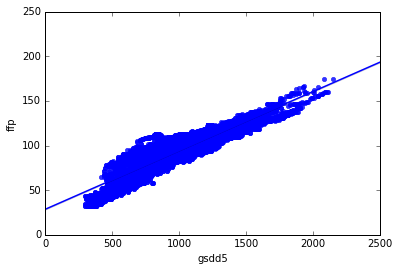

In [145]:
sns.regplot(x="gsdd5", y='ffp', data=trees)

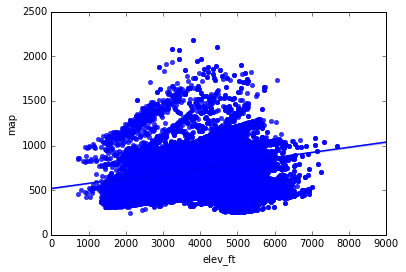

In [144]:
sns.regplot(x="elev_ft", y='map', data=trees)

## Regression on lnTPA

In [11]:
treer=pd.get_dummies(trees, columns=["Rock_Type", "Ash_Code"])
treer.head()

Stand_ID  Latitude  Longitude  StandBA  StandQMD         SDI        SDI_m  \
0  45_510942   47.5803   -116.280   234.52    2.0736  800.467308  1977.994742   
1  24_213935   45.1997   -118.540   112.19    1.4384  442.488600  1093.411456   
2  24_220620   46.9217   -121.130   131.46    1.5616  501.872976  1240.153218   
3  24_111633   44.6467   -118.893    84.14    1.2677  348.816013   861.941809   
4  24_207621   43.7195   -121.096    90.86    1.3195  370.762236   916.172024   

      lnQMD     QMDcm   lnQMDcm        ...          Other_BA_FRACT  \
0  0.729286  5.266944  1.661450        ...                 0.52555   
1  0.363531  3.653536  1.295695        ...                 0.08941   
2  0.445711  3.966464  1.377875        ...                 0.51384   
3  0.237204  3.219958  1.169368        ...                 0.12762   
4  0.277253  3.351530  1.209417        ...                 0.02668   

   Rock_Type_CaMetased  Rock_Type_Extrusive  Rock_Type_Glacial  \
0                    0                    0                  0   
1                    0                    1                  0   
2                    0                    1                  0   
3                    0                    0                  0   
4                    0                    1                  0   

   Rock_Type_Intrusive  Rock_Type_Metasediment  Rock_Type_Sedimentary  \
0                    0                       1                      0   
1                    0                       0                      0   
2                    0                       0                      0   
3                    0                       0                      1   
4                    0                       0                      0   

   Ash_Code_Andisol  Ash_Code_AshInflu  Ash_Code_NonAndic  
0                 0                  0                  1  
1                 0                  0                  1  
2                 0                  1                  0  
3                 0                  0                  1  
4                 1                  0                  0  

[5 rows x 49 columns]

In [12]:
treer=treer.drop(['Stand_ID','StandBA','StandQMD','QMDcm','lnQMDcm','StandTPA','StandTPH','lnTPH','SDI','SDI_m','Slope','Aspect'], axis=1) #,'Latitude','Longitude''lnTPA','lnQMD'

In [13]:
treer.dtypes

Latitude                  float64
Longitude                 float64
lnQMD                     float64
lnTPA                     float64
elev_ft                   float64
mat                       float64
map                         int64
gsp                         int64
mtcm                      float64
mtwm                      float64
ffp                         int64
dd5                         int64
gsdd5                       int64
d100                        int64
dd0                         int64
smrsprpb                  float64
sdi                       float64
adi                       float64
tan_slope                 float64
cos_aspect                float64
tan_slope_cos_aspect      float64
sin_aspect                float64
tan_slope_sin_aspect      float64
DF_BA_FRACT               float64
GF_BA_FRACT               float64
PP_BA_FRACT               float64
WL_BA_FRACT               float64
Other_BA_FRACT            float64
Rock_Type_CaMetased         uint8
Rock_Type_Extr

In [14]:
from sklearn.model_selection import train_test_split
X=treer.drop('lnTPA',axis=1)
y=treer.lnTPA
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print X_train.shape
print X_test.shape

(69289, 36)
(23097, 36)


In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

lr.intercept_: -33599.764421
Training set score: 0.68
Test set score: 0.67
Number of features used: 36


In [16]:
lr_coef = pd.Series(data=lr.coef_,index=X_train.columns)
lr_coef.sort_values(ascending=False,inplace=True)
lr_coef

Other_BA_FRACT            33605.196732
GF_BA_FRACT               33604.051290
WL_BA_FRACT               33603.883189
DF_BA_FRACT               33603.856236
PP_BA_FRACT               33603.486984
smrsprpb                      0.322560
mat                           0.233051
tan_slope_cos_aspect          0.136280
mtcm                          0.074770
Rock_Type_Sedimentary         0.055514
Rock_Type_Metasediment        0.044904
Ash_Code_Andisol              0.018119
d100                          0.008179
adi                           0.007039
sin_aspect                    0.003035
dd0                           0.002020
ffp                           0.001540
dd5                           0.000648
map                           0.000626
gsdd5                        -0.000153
elev_ft                      -0.000160
gsp                          -0.000527
tan_slope                    -0.001693
Ash_Code_AshInflu            -0.003612
tan_slope_sin_aspect         -0.006372
Rock_Type_Intrusive      

In [104]:
from sklearn.linear_model import Ridge, RidgeCV
ridge = Ridge().fit(X_train, y_train)

print("ridge.intercept_: {}".format(ridge.intercept_))
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))

ridge.intercept_: 4.11835915015
Training set score: 0.68
Test set score: 0.67
Number of features used: 38


In [105]:
ridge_coef = pd.Series(data=ridge.coef_,index=X_train.columns)
ridge_coef.sort_values(ascending=False,inplace=True)
ridge_coef

Other_BA_FRACT            1.081032e+00
smrsprpb                  3.058149e-01
mat                       2.398147e-01
tan_slope_cos_aspect      1.374483e-01
mtcm                      7.282235e-02
Rock_Type_Sedimentary     5.652091e-02
Rock_Type_Metasediment    4.489645e-02
Ash_Code_Andisol          1.617537e-02
d100                      8.305915e-03
adi                       4.235058e-03
dd0                       2.001300e-03
ffp                       1.403370e-03
dd5                       6.485141e-04
map                       6.335635e-04
tan_slope                -4.327477e-08
Slope                    -4.327686e-06
Aspect                   -3.359034e-05
gsdd5                    -1.424393e-04
sin_aspect               -1.426988e-04
elev_ft                  -1.540517e-04
gsp                      -5.987496e-04
Ash_Code_AshInflu        -2.762560e-03
tan_slope_sin_aspect     -6.224392e-03
Ash_Code_NonAndic        -1.341281e-02
Rock_Type_Intrusive      -1.402219e-02
Rock_Type_Glacial        

In [106]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("lasso.intercept_: {}".format(lasso.intercept_))
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

lasso.intercept_: 5.76897259099
Training set score: 0.05
Test set score: 0.06
Number of features used: 7


In [ ]:
#from sklearn.model_selection import GridSearchCV
alphas=np.array([10,1,.1,.01,.001,.0001,0])
model=Lasso(tol=.0001)
grid=GridSearchCV(estimator=model,param_grid=dict(alpha=alphas))
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

In [107]:
lasso_coef = pd.Series(data=lasso.coef_,index=X_train.columns)
lasso_coef.sort_values(ascending=False,inplace=True)
lasso_coef

map                       0.001054
dd0                       0.000252
Ash_Code_NonAndic        -0.000000
cos_aspect                0.000000
Longitude                -0.000000
lnQMD                    -0.000000
mat                      -0.000000
mtcm                      0.000000
mtwm                     -0.000000
ffp                      -0.000000
dd5                      -0.000000
d100                      0.000000
smrsprpb                  0.000000
sdi                       0.000000
Ash_Code_AshInflu         0.000000
tan_slope                -0.000000
adi                      -0.000000
tan_slope_cos_aspect      0.000000
Rock_Type_CaMetased       0.000000
Ash_Code_Andisol          0.000000
Rock_Type_Sedimentary     0.000000
Rock_Type_Metasediment   -0.000000
Rock_Type_Intrusive      -0.000000
Rock_Type_Glacial         0.000000
sin_aspect                0.000000
Rock_Type_Extrusive      -0.000000
Other_BA_FRACT            0.000000
WL_BA_FRACT               0.000000
PP_BA_FRACT         

In [108]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X_train, y_train)

print('Decision Tree regressor score on training set: {:.2f}'
     .format(dtr.score(X_train, y_train)))
print('Decision Tree regressor on test set: {:.2f}'
     .format(dtr.score(X_test, y_test)))

Decision Tree regressor score on training set: 1.00
Decision Tree regressor on test set: 0.62


In [109]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=200).fit(X_train,y_train)

print('Accuracy of Random Forest regressor on training set: {:.2f}'
     .format(rfr.score(X_train, y_train)))
print('Accuracy of Random Forest regressor on test set: {:.2f}'
     .format(rfr.score(X_test, y_test)))

Accuracy of Random Forest regressor on training set: 0.97
Accuracy of Random Forest regressor on test set: 0.81


In [110]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=300).fit(X_train,y_train)

print('Accuracy of Random Forest regressor on training set: {:.2f}'
     .format(rfr.score(X_train, y_train)))
print('Accuracy of Random Forest regressor on test set: {:.2f}'
     .format(rfr.score(X_test, y_test)))

Accuracy of Random Forest regressor on training set: 0.97
Accuracy of Random Forest regressor on test set: 0.81


In [ ]:
from sklearn.model_selection import cross_val_score

n_range = range(100,500,100)
rfr_scores = []
for n in n_range:
    rfrn = RandomForestRegressor(n_estimators=n)#.fit(X_train,y_train)
    scores = cross_val_score(rfrn,X_train,y_train,cv=10)
    rfr_scores.append(scores.mean())
plt.plot(n_range, rfr_scores)
plt.xlabel('Value of n for RFR')
plt.ylabel('RFR Scores')

Find the importance of each variable in the Random Foret Regressor

In [111]:
important_features = pd.Series(data=rfr.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

lnQMD                     0.711888
Other_BA_FRACT            0.037820
GF_BA_FRACT               0.030976
DF_BA_FRACT               0.030261
Latitude                  0.016944
Longitude                 0.016403
map                       0.010329
tan_slope_cos_aspect      0.009950
tan_slope_sin_aspect      0.009562
gsp                       0.008396
elev_ft                   0.008338
PP_BA_FRACT               0.007948
smrsprpb                  0.007529
dd0                       0.007165
adi                       0.007071
WL_BA_FRACT               0.006995
gsdd5                     0.006602
sdi                       0.006475
ffp                       0.006276
cos_aspect                0.005964
mtcm                      0.005732
Aspect                    0.005497
sin_aspect                0.005362
Slope                     0.005188
tan_slope                 0.005096
dd5                       0.004395
d100                      0.003248
mtwm                      0.003063
mat                 

In [112]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=300).fit(X_train, y_train)
print("Training set score: {:.2f}".format(gbr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gbr.score(X_test, y_test)))

Training set score: 0.81
Test set score: 0.80


MSE: 0.4317


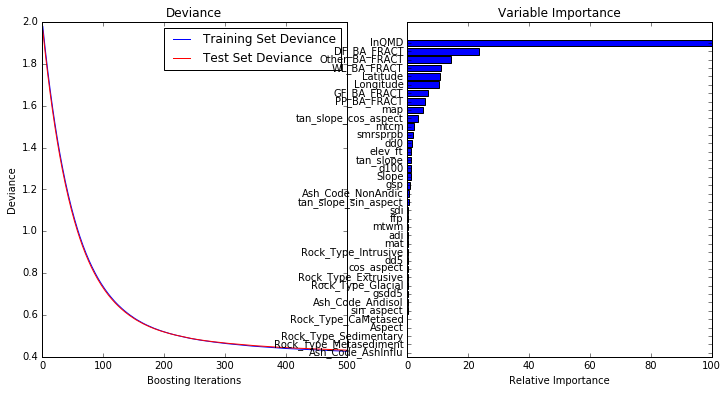

In [15]:
from sklearn.metrics import mean_squared_error
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [113]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor().fit(X_train, y_train)
print("Training set score: {:.2f}".format(br.score(X_train, y_train)))
print("Test set score: {:.2f}".format(br.score(X_test, y_test)))

Training set score: 0.96
Test set score: 0.79


In [114]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
reg.fit(X_train, y_train)
print("Train set R^2: {:.2f}".format(reg.score(X_train, y_train)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Train set R^2: 0.40
Test set R^2: 0.08


In [32]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(solver='lbfgs') #lbfgs, sgd, adam
mlpr.fit(X_train,y_train)
print('Accuracy of NN regressor on training set: {:.2f}'
     .format(mlpr.score(X_train, y_train)))
print('Accuracy of NN regressor on test set: {:.2f}'
     .format(mlpr.score(X_test, y_test)))

Accuracy of NN regressor on training set: -0.13
Accuracy of NN regressor on test set: -0.13


## Regression on lnQMD

In [44]:
treeq=pd.get_dummies(trees, columns=["Rock_Type", "Ash_Code"])
treeq=treeq.drop(['Stand_ID','StandBA','StandQMD','QMDcm','lnQMDcm','StandTPA','StandTPH','lnTPH','SDI','SDI_m','Slope','Aspect'], axis=1)
from sklearn.model_selection import train_test_split
X=treeq.drop('lnQMD',axis=1)
y=treeq.lnQMD
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#print X_train.shape
#print X_test.shape

In [18]:
lr = LinearRegression().fit(X_train, y_train)
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

lr.intercept_: -7045.62176661
Training set score: 0.66
Test set score: 0.65
Number of features used: 36


In [19]:
lr_coef = pd.Series(data=lr.coef_,index=X_train.columns)
lr_coef.sort_values(ascending=False,inplace=True)
lr_coef

Other_BA_FRACT            7047.414139
DF_BA_FRACT               7047.142416
GF_BA_FRACT               7047.116622
WL_BA_FRACT               7047.040406
PP_BA_FRACT               7046.976608
tan_slope                    0.156619
smrsprpb                     0.145986
mat                          0.071586
tan_slope_cos_aspect         0.065483
Rock_Type_Sedimentary        0.027985
Rock_Type_Metasediment       0.022761
adi                          0.015666
sin_aspect                   0.007457
d100                         0.006841
Rock_Type_Intrusive          0.006363
sdi                          0.006020
ffp                          0.002953
Ash_Code_AshInflu            0.002535
gsp                          0.001068
dd5                          0.000785
map                          0.000125
elev_ft                     -0.000015
gsdd5                       -0.000071
dd0                         -0.000177
Ash_Code_Andisol            -0.001159
Ash_Code_NonAndic           -0.001481
Rock_Type_Ca

In [21]:
from sklearn.linear_model import Ridge, RidgeCV
ridge = Ridge().fit(X_train, y_train)
print("ridge.intercept_: {}".format(ridge.intercept_))
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))

ridge.intercept_: 1.47492547262
Training set score: 0.66
Test set score: 0.65
Number of features used: 36


In [22]:
ridge_coef = pd.Series(data=ridge.coef_,index=X_train.columns)
ridge_coef.sort_values(ascending=False,inplace=True)
ridge_coef

Other_BA_FRACT            0.271179
tan_slope                 0.156663
smrsprpb                  0.141751
mat                       0.072584
tan_slope_cos_aspect      0.065286
Rock_Type_Sedimentary     0.028219
Rock_Type_Metasediment    0.022739
adi                       0.015117
sin_aspect                0.007527
d100                      0.006866
Rock_Type_Intrusive       0.006216
sdi                       0.006006
DF_BA_FRACT               0.005198
ffp                       0.002925
Ash_Code_AshInflu         0.002686
gsp                       0.001056
dd5                       0.000785
map                       0.000125
elev_ft                  -0.000014
gsdd5                    -0.000069
dd0                      -0.000181
Ash_Code_NonAndic        -0.001101
Ash_Code_Andisol         -0.001584
Rock_Type_Extrusive      -0.004449
Rock_Type_CaMetased      -0.004681
GF_BA_FRACT              -0.020509
mtcm                     -0.027799
cos_aspect               -0.032692
tan_slope_sin_aspect

In [23]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.01).fit(X_train, y_train)
print("lasso.intercept_: {}".format(lasso.intercept_))
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

lasso.intercept_: 0.447147013876
Training set score: 0.65
Test set score: 0.64
Number of features used: 10


In [24]:
lasso_coef = pd.Series(data=lasso.coef_,index=X_train.columns)
lasso_coef.sort_values(ascending=False,inplace=True)#
lasso_coef

ffp                       0.000839
map                       0.000303
gsp                       0.000153
elev_ft                   0.000077
dd5                       0.000064
Ash_Code_NonAndic         0.000000
tan_slope_cos_aspect      0.000000
mat                       0.000000
mtcm                      0.000000
mtwm                     -0.000000
d100                     -0.000000
smrsprpb                 -0.000000
sdi                       0.000000
adi                       0.000000
Ash_Code_AshInflu        -0.000000
cos_aspect                0.000000
tan_slope                 0.000000
sin_aspect               -0.000000
tan_slope_sin_aspect     -0.000000
Ash_Code_Andisol         -0.000000
Rock_Type_Sedimentary     0.000000
Rock_Type_Metasediment   -0.000000
Rock_Type_Intrusive      -0.000000
Rock_Type_Glacial        -0.000000
Rock_Type_Extrusive       0.000000
Rock_Type_CaMetased      -0.000000
Other_BA_FRACT            0.000000
WL_BA_FRACT              -0.000000
GF_BA_FRACT         

In [45]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X_train, y_train)
print('Decision Tree regressor score on training set: {:.2f}'
     .format(dtr.score(X_train, y_train)))
print('Decision Tree regressor on test set: {:.2f}'
     .format(dtr.score(X_test, y_test)))

Decision Tree regressor score on training set: 1.00
Decision Tree regressor on test set: 0.57


In [48]:
!pip install pydot

distributed 1.21.8 requires msgpack, which is not installed.
grin 1.2.1 requires argparse>=1.1, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
from sklearn.tree import export_graphviz
import pydot

export_graphviz(dtr, out_file = 'tree.dot')
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [27]:
important_features = pd.Series(data=dtr.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

lnTPA                     0.718698
Latitude                  0.028218
DF_BA_FRACT               0.026059
Longitude                 0.024624
GF_BA_FRACT               0.014233
PP_BA_FRACT               0.014209
Other_BA_FRACT            0.013516
tan_slope                 0.012769
tan_slope_cos_aspect      0.011592
smrsprpb                  0.011429
tan_slope_sin_aspect      0.011007
map                       0.010530
WL_BA_FRACT               0.010518
gsp                       0.008364
ffp                       0.008137
elev_ft                   0.008101
cos_aspect                0.007680
sdi                       0.007642
gsdd5                     0.007550
adi                       0.007129
sin_aspect                0.006955
dd0                       0.006061
mtcm                      0.004814
dd5                       0.004774
mtwm                      0.002961
d100                      0.002874
mat                       0.002558
Rock_Type_Metasediment    0.001064
Rock_Type_Intrusive 

In [28]:
from sklearn.ensemble import AdaBoostRegressor
adtr=AdaBoostRegressor(DecisionTreeRegressor()).fit(X_train, y_train)
print('AdaDecision Tree regressor score on training set: {:.2f}'
     .format(adtr.score(X_train, y_train)))
print('AdaDecision Tree regressor on test set: {:.2f}'
     .format(adtr.score(X_test, y_test)))

AdaDecision Tree regressor score on training set: 1.00
AdaDecision Tree regressor on test set: 0.78


In [29]:
important_features = pd.Series(data=adtr.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

lnTPA                     0.598687
Latitude                  0.035090
Longitude                 0.032417
DF_BA_FRACT               0.031248
GF_BA_FRACT               0.022556
tan_slope                 0.020395
Other_BA_FRACT            0.018274
tan_slope_sin_aspect      0.017667
tan_slope_cos_aspect      0.017637
WL_BA_FRACT               0.016417
PP_BA_FRACT               0.016111
map                       0.015663
smrsprpb                  0.015038
gsp                       0.013798
elev_ft                   0.013544
adi                       0.011661
sin_aspect                0.011241
cos_aspect                0.011199
ffp                       0.011030
sdi                       0.010557
gsdd5                     0.010529
dd0                       0.010135
mtcm                      0.007809
dd5                       0.006689
mtwm                      0.004602
d100                      0.004537
mat                       0.003868
Rock_Type_Metasediment    0.001836
Rock_Type_Intrusive 

In [31]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100).fit(X_train,y_train)#n_estimators=400
print('Accuracy of Random Forest regressor on training set: {:.2f}'
     .format(rfr.score(X_train, y_train)))
print('Accuracy of Random Forest regressor on test set: {:.2f}'
     .format(rfr.score(X_test, y_test)))

Accuracy of Random Forest regressor on training set: 0.97
Accuracy of Random Forest regressor on test set: 0.78


In [32]:
important_features = pd.Series(data=rfr.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

lnTPA                     0.716281
Latitude                  0.028615
Longitude                 0.025533
DF_BA_FRACT               0.025123
GF_BA_FRACT               0.014232
Other_BA_FRACT            0.013403
PP_BA_FRACT               0.013289
tan_slope                 0.013201
tan_slope_cos_aspect      0.011995
tan_slope_sin_aspect      0.011471
smrsprpb                  0.010716
map                       0.010651
WL_BA_FRACT               0.010522
gsp                       0.008946
elev_ft                   0.008657
ffp                       0.007725
adi                       0.007654
cos_aspect                0.007500
sin_aspect                0.007351
gsdd5                     0.007301
sdi                       0.007191
dd0                       0.006729
mtcm                      0.005147
dd5                       0.004690
mtwm                      0.003129
d100                      0.002974
mat                       0.002604
Rock_Type_Metasediment    0.001127
Rock_Type_Intrusive 

In [33]:
from sklearn.ensemble import AdaBoostRegressor
adrfr=AdaBoostRegressor(RandomForestRegressor()).fit(X_train, y_train)
print('AdaDecision Tree regressor score on training set: {:.2f}'
     .format(adrfr.score(X_train, y_train)))
print('AdaDecision Tree regressor on test set: {:.2f}'
     .format(adrfr.score(X_test, y_test)))

AdaDecision Tree regressor score on training set: 0.99
AdaDecision Tree regressor on test set: 0.79


In [ ]:
#from sklearn.ensemble import AdaBoostRegressor
#adrfr=AdaBoostRegressor(RandomForestRegressor(n_estimators=100)).fit(X_train, y_train)
#print('AdaDecision Tree regressor score on training set: {:.2f}'
#     .format(adrfr.score(X_train, y_train)))
#print('AdaDecision Tree regressor on test set: {:.2f}'
#     .format(adrfr.score(X_test, y_test)))

In [34]:
important_features = pd.Series(data=adrfr.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

lnTPA                     0.552742
Latitude                  0.036026
Longitude                 0.034869
DF_BA_FRACT               0.033559
GF_BA_FRACT               0.025164
tan_slope                 0.022995
tan_slope_cos_aspect      0.020022
tan_slope_sin_aspect      0.019898
Other_BA_FRACT            0.019586
map                       0.017925
WL_BA_FRACT               0.017612
PP_BA_FRACT               0.017153
smrsprpb                  0.016892
elev_ft                   0.015622
gsp                       0.015462
adi                       0.013306
sin_aspect                0.013170
cos_aspect                0.013077
ffp                       0.012819
sdi                       0.012442
gsdd5                     0.012419
dd0                       0.011701
mtcm                      0.009220
dd5                       0.008050
mtwm                      0.005354
d100                      0.005078
mat                       0.004529
Rock_Type_Metasediment    0.002055
Rock_Type_Intrusive 

In [180]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=200).fit(X_train, y_train)
print("Training set score: {:.2f}".format(gbr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gbr.score(X_test, y_test)))

Training set score: 0.76
Test set score: 0.75


In [181]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(n_estimators=200).fit(X_train, y_train)
print("Training set score: {:.2f}".format(br.score(X_train, y_train)))
print("Test set score: {:.2f}".format(br.score(X_test, y_test)))

Training set score: 0.97
Test set score: 0.79


In [190]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor()
reg.fit(X_train, y_train)
print("Train set R^2: {:.2f}".format(reg.score(X_train, y_train)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Train set R^2: 0.42
Test set R^2: 0.10


## Regression on Basal Area

In [35]:
treeb=pd.get_dummies(trees, columns=["Rock_Type", "Ash_Code"])
treeb.head()

Stand_ID  Latitude  Longitude  StandBA  StandQMD         SDI        SDI_m  \
0  45_510942   47.5803   -116.280   234.52    2.0736  800.467308  1977.994742   
1  24_213935   45.1997   -118.540   112.19    1.4384  442.488600  1093.411456   
2  24_220620   46.9217   -121.130   131.46    1.5616  501.872976  1240.153218   
3  24_111633   44.6467   -118.893    84.14    1.2677  348.816013   861.941809   
4  24_207621   43.7195   -121.096    90.86    1.3195  370.762236   916.172024   

      lnQMD     QMDcm   lnQMDcm        ...          Other_BA_FRACT  \
0  0.729286  5.266944  1.661450        ...                 0.52555   
1  0.363531  3.653536  1.295695        ...                 0.08941   
2  0.445711  3.966464  1.377875        ...                 0.51384   
3  0.237204  3.219958  1.169368        ...                 0.12762   
4  0.277253  3.351530  1.209417        ...                 0.02668   

   Rock_Type_CaMetased  Rock_Type_Extrusive  Rock_Type_Glacial  \
0                    0                    0                  0   
1                    0                    1                  0   
2                    0                    1                  0   
3                    0                    0                  0   
4                    0                    1                  0   

   Rock_Type_Intrusive  Rock_Type_Metasediment  Rock_Type_Sedimentary  \
0                    0                       1                      0   
1                    0                       0                      0   
2                    0                       0                      0   
3                    0                       0                      1   
4                    0                       0                      0   

   Ash_Code_Andisol  Ash_Code_AshInflu  Ash_Code_NonAndic  
0                 0                  0                  1  
1                 0                  0                  1  
2                 0                  1                  0  
3                 0                  0                  1  
4                 1                  0                  0  

[5 rows x 49 columns]

In [6]:
treeb.dtypes

Latitude                  float64
Longitude                 float64
StandBA                   float64
Aspect                      int64
Slope                       int64
elev_ft                   float64
mat                       float64
map                         int64
gsp                         int64
mtcm                      float64
mtwm                      float64
ffp                         int64
dd5                         int64
gsdd5                       int64
d100                        int64
dd0                         int64
smrsprpb                  float64
sdi                       float64
adi                       float64
tan_slope                 float64
cos_aspect                float64
tan_slope_cos_aspect      float64
sin_aspect                float64
tan_slope_sin_aspect      float64
DF_BA_FRACT               float64
GF_BA_FRACT               float64
PP_BA_FRACT               float64
WL_BA_FRACT               float64
Other_BA_FRACT            float64
Rock_Type_CaMe

In [36]:
treeb=treeb.drop(['Stand_ID','lnTPA','lnQMD','StandQMD','QMDcm','lnQMDcm','StandTPA','StandTPH','lnTPH','SDI','SDI_m','Aspect','Slope'], axis=1)
from sklearn.model_selection import train_test_split
X=treeb.drop('StandBA',axis=1)
y=treeb.StandBA
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print X_train.shape
print X_test.shape

(69289, 35)
(23097, 35)


In [37]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=200).fit(X_train,y_train)

print('Accuracy of Random Forest regressor on training set: {:.2f}'
     .format(rfr.score(X_train, y_train)))
print('Accuracy of Random Forest regressor on test set: {:.2f}'
     .format(rfr.score(X_test, y_test)))

Accuracy of Random Forest regressor on training set: 0.92
Accuracy of Random Forest regressor on test set: 0.42


In [38]:
important_features = pd.Series(data=rfr.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

GF_BA_FRACT               0.117705
Latitude                  0.091989
DF_BA_FRACT               0.078487
Longitude                 0.075239
Other_BA_FRACT            0.062425
map                       0.062116
tan_slope_cos_aspect      0.042293
tan_slope_sin_aspect      0.039757
WL_BA_FRACT               0.037348
tan_slope                 0.035868
gsp                       0.031558
elev_ft                   0.029718
smrsprpb                  0.029053
adi                       0.027155
PP_BA_FRACT               0.025233
sdi                       0.024014
gsdd5                     0.023705
sin_aspect                0.023589
cos_aspect                0.023281
dd0                       0.022447
ffp                       0.020432
dd5                       0.015938
mtcm                      0.014662
d100                      0.008744
mtwm                      0.008601
mat                       0.007746
Rock_Type_Metasediment    0.003007
Rock_Type_Intrusive       0.002915
Ash_Code_NonAndic   

In [39]:
from sklearn.ensemble import AdaBoostRegressor
adrfr=AdaBoostRegressor(RandomForestRegressor()).fit(X_train, y_train)
print('AdaDecision Tree regressor score on training set: {:.2f}'
     .format(adrfr.score(X_train, y_train)))
print('AdaDecision Tree regressor on test set: {:.2f}'
     .format(adrfr.score(X_test, y_test)))

AdaDecision Tree regressor score on training set: 0.95
AdaDecision Tree regressor on test set: 0.44


In [40]:
important_features = pd.Series(data=adrfr.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

Latitude                  0.086128
GF_BA_FRACT               0.078033
map                       0.073871
Longitude                 0.070420
DF_BA_FRACT               0.061130
Other_BA_FRACT            0.058203
tan_slope_sin_aspect      0.048448
tan_slope_cos_aspect      0.047401
WL_BA_FRACT               0.040783
tan_slope                 0.039022
elev_ft                   0.034497
gsp                       0.034357
adi                       0.031354
smrsprpb                  0.030109
sin_aspect                0.027685
sdi                       0.027187
gsdd5                     0.026676
cos_aspect                0.026394
PP_BA_FRACT               0.026155
dd0                       0.024480
ffp                       0.022505
dd5                       0.018546
mtcm                      0.015422
mtwm                      0.009947
d100                      0.009258
mat                       0.008066
Ash_Code_NonAndic         0.003466
Ash_Code_AshInflu         0.003354
Rock_Type_Intrusive 

In [8]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=300).fit(X_train, y_train)
print("Training set score: {:.2f}".format(gbr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(gbr.score(X_test, y_test)))

Training set score: 0.35
Test set score: 0.32


## Regression on SDI

In [44]:
treeo=pd.get_dummies(trees, columns=["Rock_Type", "Ash_Code"])
treeo.head()

Stand_ID  Latitude  Longitude  StandBA  StandQMD         SDI        SDI_m  \
0  45_510942   47.5803   -116.280   234.52    2.0736  800.467308  1977.994742   
1  24_213935   45.1997   -118.540   112.19    1.4384  442.488600  1093.411456   
2  24_220620   46.9217   -121.130   131.46    1.5616  501.872976  1240.153218   
3  24_111633   44.6467   -118.893    84.14    1.2677  348.816013   861.941809   
4  24_207621   43.7195   -121.096    90.86    1.3195  370.762236   916.172024   

      lnQMD     QMDcm   lnQMDcm        ...          Other_BA_FRACT  \
0  0.729286  5.266944  1.661450        ...                 0.52555   
1  0.363531  3.653536  1.295695        ...                 0.08941   
2  0.445711  3.966464  1.377875        ...                 0.51384   
3  0.237204  3.219958  1.169368        ...                 0.12762   
4  0.277253  3.351530  1.209417        ...                 0.02668   

   Rock_Type_CaMetased  Rock_Type_Extrusive  Rock_Type_Glacial  \
0                    0                    0                  0   
1                    0                    1                  0   
2                    0                    1                  0   
3                    0                    0                  0   
4                    0                    1                  0   

   Rock_Type_Intrusive  Rock_Type_Metasediment  Rock_Type_Sedimentary  \
0                    0                       1                      0   
1                    0                       0                      0   
2                    0                       0                      0   
3                    0                       0                      1   
4                    0                       0                      0   

   Ash_Code_Andisol  Ash_Code_AshInflu  Ash_Code_NonAndic  
0                 0                  0                  1  
1                 0                  0                  1  
2                 0                  1                  0  
3                 0                  0                  1  
4                 1                  0                  0  

[5 rows x 49 columns]

In [45]:
treeo=treeo.drop(['Stand_ID','lnTPA','lnQMD','StandQMD','QMDcm','lnQMDcm','StandTPA','StandTPH','lnTPH','StandBA','SDI_m','Aspect','Slope'], axis=1)
from sklearn.model_selection import train_test_split
X=treeo.drop('SDI',axis=1)
y=treeo.SDI
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print X_train.shape
print X_test.shape

(69289, 35)
(23097, 35)


In [46]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor().fit(X_train,y_train)

print('Accuracy of Random Forest regressor on training set: {:.2f}'
     .format(rfr.score(X_train, y_train)))
print('Accuracy of Random Forest regressor on test set: {:.2f}'
     .format(rfr.score(X_test, y_test)))

Accuracy of Random Forest regressor on training set: 0.89
Accuracy of Random Forest regressor on test set: 0.36


## Create Dummy Coded Variables for Association Analysis

## Association on 95% Quantile

In [3]:
sdimax = pd.read_excel("C:\Users\heid4253\Documents\FinalProject\ProjecttreesCleanX_SDI.xlsx")

In [29]:
treed=pd.get_dummies(sdimax, columns=["Rock_Type", "Ash_Code"])
treed.head()

Stand_ID  Latitude  Longitude  StandBA  StandQMD         SDI        SDI_m  \
0  45_510942   47.5803   -116.280   234.52    2.0736  800.467308  1977.994742   
1  24_213935   45.1997   -118.540   112.19    1.4384  442.488600  1093.411456   
2  24_220620   46.9217   -121.130   131.46    1.5616  501.872976  1240.153218   
3  24_111633   44.6467   -118.893    84.14    1.2677  348.816013   861.941809   
4  24_207621   43.7195   -121.096    90.86    1.3195  370.762236   916.172024   

      lnQMD     QMDcm   lnQMDcm  StandTPA     lnTPA      StandTPH      lnTPH  \
0  0.729286  5.266944  1.661450  10000.00  9.210340  24710.500000  10.114984   
1  0.363531  3.653536  1.295695   9942.72  9.204596  24568.958256  10.109239   
2  0.445711  3.966464  1.377875   9883.58  9.198630  24422.820359  10.103273   
3  0.237204  3.219958  1.169368   9599.64  9.169481  23721.190422  10.074124   
4  0.277253  3.351530  1.209417   9568.38  9.166219  23643.945399  10.070862   

   Aspect  Slope  elev_ft  mat   map  gsp  mtcm  mtwm  ffp   dd5  gsdd5  d100  \
0     125     27  2969.16  6.8   911  306  -3.4  17.8  115  1683   1227   119   
1     300      5  4820.38  4.6   749  246  -5.1  15.1   72  1179    653   143   
2     179     22  3973.40  4.5  1229  281  -4.1  14.4   91  1095    720   146   
3      52     20  5130.60  4.1   551  202  -5.5  14.3   39  1070    350   146   
4     178      5  5689.05  5.1   353  127  -3.4  15.3   53  1211    548   141   

   dd0  smrsprpb     sdi      adi  tan_slope  cos_aspect  \
0  453      0.54  5.5000  1.84742       0.27   -0.573576   
1  659      0.43  4.7927  1.57410       0.05    0.500000   
2  615      0.40  3.8968  0.89097       0.22   -0.999848   
3  711      0.51  5.2970  1.94192       0.20    0.615661   
4  545      0.67  9.5354  3.43059       0.05   -0.999391   

   tan_slope_cos_aspect  sin_aspect  tan_slope_sin_aspect  DF_BA_FRACT  \
0             -0.154866    0.819152              0.221171      0.00000   
1              0.025000   -0.866025             -0.043301      0.18401   
2             -0.219966    0.017452              0.003840      0.21670   
3              0.123132    0.788011              0.157602      0.21098   
4             -0.049970    0.034899              0.001745      0.00000   

   GF_BA_FRACT  PP_BA_FRACT  WL_BA_FRACT  Other_BA_FRACT         SDI99  \
0      0.47445      0.00000      0.00000         0.52555  19063.198550   
1      0.58141      0.00001      0.14516         0.08941  34172.155986   
2      0.13149      0.00000      0.13797         0.51384  29972.297875   
3      0.47165      0.04678      0.14297         0.12762  41804.211064   
4      0.00000      0.97332      0.00000         0.02668  39216.189437   

  Above_Below99         SDI95 Above_Below95  Rock_Type_CaMetased  \
0         Above  13680.317005         Above                    0   
1         Below  24384.160514         Above                    0   
2         Below  21414.567514         Above                    0   
3         Below  29771.731477         Below                    0   
4         Below  27945.980803         Below                    0   

   Rock_Type_Extrusive  Rock_Type_Glacial  Rock_Type_Intrusive  \
0                    0                  0                    0   
1                    1                  0                    0   
2                    1                  0                    0   
3                    0                  0                    0   
4                    1                  0                    0   

   Rock_Type_Metasediment  Rock_Type_Sedimentary  Ash_Code_Andisol  \
0                       1                      0                 0   
1                       0                      0                 0   
2                       0                      0                 0   
3                       0                      1                 0   
4                       0                      0                 1   

   Ash_Code_AshInflu  Ash_Code_NonAndic  
0                  0         

In [30]:
treed=pd.get_dummies(treed, columns=["Above_Below99", "Above_Below95"])

In [31]:
treed['elevation']=pd.cut(treed.elev_ft,bins=[0,1000,2000,3000,4000,5000,6000,7000,8000],labels=["less_1000","btw_1_2thou","btw_2_3thou","btw_3_4thou","btw_4_5thou","btw_5_6thou","btw_6_7thou","great_7000"])
treed=pd.get_dummies(treed, columns=["elevation"])

In [32]:
treed['DF_BA']=pd.cut(treed.DF_BA_FRACT, bins=[0,0.001,.25,.5,.75,1],labels=["no","low","medium","high","full"])
treed['GF_BA']=pd.cut(treed.GF_BA_FRACT, bins=[0,0.001,.25,.5,.75,1],labels=["no","low","medium","high","full"])
treed['PP_BA']=pd.cut(treed.PP_BA_FRACT, bins=[0,0.001,.25,.5,.75,1],labels=["no","low","medium","high","full"])
treed['WL_BA']=pd.cut(treed.WL_BA_FRACT, bins=[0,0.001,.25,.5,.75,1],labels=["no","low","medium","high","full"])
treed['Other_BA']=pd.cut(treed.Other_BA_FRACT, bins=[0,0.001,.25,.5,.75,1],labels=["no","low","medium","high","full"])
treed=pd.get_dummies(treed, columns=["DF_BA","GF_BA","PP_BA","WL_BA","Other_BA"])

In [33]:
treed['temp']=pd.qcut(treed.mat,3,labels=["low","med","high"])
treed=pd.get_dummies(treed,columns=["temp"])

In [34]:
treed['precip']=pd.qcut(treed.map,3,labels=["low","med","high"])
treed=pd.get_dummies(treed,columns=["precip"])

In [35]:
treed['gs_precip']=pd.qcut(treed.gsp,3,labels=["low","med","high"])
treed=pd.get_dummies(treed,columns=["gs_precip"])

In [36]:
treed['temp_cold_month']=pd.qcut(treed.mtcm,3,labels=["low","med","high"])
treed=pd.get_dummies(treed,columns=["temp_cold_month"])

In [37]:
treed['temp_warm_month']=pd.qcut(treed.mtwm,3,labels=["low","med","high"])
treed=pd.get_dummies(treed,columns=["temp_warm_month"])

In [38]:
treed['frost_free']=pd.qcut(treed.ffp,3,labels=["low","med","high"])
treed=pd.get_dummies(treed,columns=["frost_free"])

In [39]:
treed['dd5']=pd.qcut(treed.dd5,3,labels=["low","med","high"])
treed=pd.get_dummies(treed,columns=["dd5"])

In [40]:
treed['gsdd5']=pd.qcut(treed.gsdd5,3,labels=["low","med","high"])
treed=pd.get_dummies(treed,columns=["gsdd5"])

In [41]:
treed['d100']=pd.qcut(treed.d100,3,labels=["low","med","high"])
treed=pd.get_dummies(treed,columns=["d100"])

In [42]:
treed['dd0']=pd.qcut(treed.dd0,3,labels=["low","med","high"])
treed=pd.get_dummies(treed,columns=["dd0"])

In [43]:
treed['smrsprpb']=pd.cut(treed.smrsprpb,bins=[0,.25,.5,.75,1],labels=["s_spring","spring","summer","s_summer"])
treed=pd.get_dummies(treed,columns=["smrsprpb"])

In [44]:
treed['s_dry_index']=pd.qcut(treed.sdi,3,labels=["low","med","high"])
treed=pd.get_dummies(treed,columns=["s_dry_index"])

In [45]:
treed['a_dry_index']=pd.qcut(treed.adi,3,labels=["low","med","high"])
treed=pd.get_dummies(treed,columns=["a_dry_index"])

In [46]:
#treed['SDI']=pd.cut(treed.SDI,bins=[0,100,200,300,400,500,600,700,800,900,1000,2500],labels=["less_100","btw_1_200","btw_2_300","btw_3_400","btw_4_500","btw_5_600","btw_6_700","btw_7_800","btw_8_900","btw_9_1000","great_1000"])
treed['SDI']=pd.qcut(treed.SDI,3,labels=["low","med","high"])
treed=pd.get_dummies(treed, columns=["SDI"])

In [47]:
treed['NS_Aspect']=pd.cut(treed.cos_aspect,bins=[-1,0,1],labels=["South","North"])
treed=pd.get_dummies(treed,columns=["NS_Aspect"])

In [48]:
treed['EW_Aspect']=pd.cut(treed.sin_aspect,bins=[-1,0,1],labels=["West","East"])
treed=pd.get_dummies(treed,columns=["EW_Aspect"])

In [49]:
treed['Slope']=pd.cut(treed.Slope,bins=[0,10,30,50,101],labels=["flat","SlightSlope","Steep","VerySteep"])
treed=pd.get_dummies(treed,columns=["Slope"])

In [50]:
pd.set_option('display.max_columns', 160)
treed.head()

Stand_ID  Latitude  Longitude  StandBA  StandQMD        SDI_m     lnQMD  \
0  45_510942   47.5803   -116.280   234.52    2.0736  1977.994742  0.729286   
1  24_213935   45.1997   -118.540   112.19    1.4384  1093.411456  0.363531   
2  24_220620   46.9217   -121.130   131.46    1.5616  1240.153218  0.445711   
3  24_111633   44.6467   -118.893    84.14    1.2677   861.941809  0.237204   
4  24_207621   43.7195   -121.096    90.86    1.3195   916.172024  0.277253   

      QMDcm   lnQMDcm  StandTPA     lnTPA      StandTPH      lnTPH  Aspect  \
0  5.266944  1.661450  10000.00  9.210340  24710.500000  10.114984     125   
1  3.653536  1.295695   9942.72  9.204596  24568.958256  10.109239     300   
2  3.966464  1.377875   9883.58  9.198630  24422.820359  10.103273     179   
3  3.219958  1.169368   9599.64  9.169481  23721.190422  10.074124      52   
4  3.351530  1.209417   9568.38  9.166219  23643.945399  10.070862     178   

   elev_ft  mat   map  gsp  mtcm  mtwm  ffp     sdi      adi  tan_slope  \
0  2969.16  6.8   911  306  -3.4  17.8  115  5.5000  1.84742       0.27   
1  4820.38  4.6   749  246  -5.1  15.1   72  4.7927  1.57410       0.05   
2  3973.40  4.5  1229  281  -4.1  14.4   91  3.8968  0.89097       0.22   
3  5130.60  4.1   551  202  -5.5  14.3   39  5.2970  1.94192       0.20   
4  5689.05  5.1   353  127  -3.4  15.3   53  9.5354  3.43059       0.05   

   cos_aspect  tan_slope_cos_aspect  sin_aspect  tan_slope_sin_aspect  \
0   -0.573576             -0.154866    0.819152              0.221171   
1    0.500000              0.025000   -0.866025             -0.043301   
2   -0.999848             -0.219966    0.017452              0.003840   
3    0.615661              0.123132    0.788011              0.157602   
4   -0.999391             -0.049970    0.034899              0.001745   

   DF_BA_FRACT  GF_BA_FRACT  PP_BA_FRACT  WL_BA_FRACT  Other_BA_FRACT  \
0      0.00000      0.47445      0.00000      0.00000         0.52555   
1      0.18401      0.58141      0.00001      0.14516         0.08941   
2      0.21670      0.13149      0.00000      0.13797         0.51384   
3      0.21098      0.47165      0.04678      0.14297         0.12762   
4      0.00000      0.00000      0.97332      0.00000         0.02668   

          SDI99         SDI95  Rock_Type_CaMetased  Rock_Type_Extrusive  \
0  19063.198550  13680.317005                    0                    0   
1  34172.155986  24384.160514                    0                    1   
2  29972.297875  21414.567514                    0                    1   
3  41804.211064  29771.731477                    0                    0   
4  39216.189437  27945.980803                    0                    1   

   Rock_Type_Glacial  Rock_Type_Intrusive  Rock_Type_Metasediment  \
0                  0                    0                       1   
1                  0                    0                       0   
2                  0                    0                       0   
3                  0                    0                       0   
4                  0                    0                       0   

   Rock_Type_Sedimentary  Ash_Code_Andisol  Ash_Code_AshInflu  \
0                      0                 0                  0   
1                      0                 0                  0   
2                      0                 0                  1   
3                      1                 0                  0   
4                      0                 1                  0   

   Ash_Code_NonAndic  Above_Below99_Above  Above_Below99_Below  \
0                  1                    1                    0   
1                  1                    0                    1   
2                  0                    0                    1   
3                  1                    0                    1   
4                  0                    0                    1   

   Above_Below95_Above  Above_Below95_Below  elevation_less_1000  \
0        

In [212]:
treep=treed

In [51]:
treed=treed.drop(['SDI99','SDI95','Stand_ID','SDI_m','Latitude','Longitude','StandQMD','StandBA','lnQMD', 'QMDcm','lnQMDcm','StandTPA','lnTPA','StandTPH','lnTPH','Aspect','elev_ft','mat','map','gsp','mtcm','mtwm','ffp','sdi','adi','tan_slope','cos_aspect','tan_slope_cos_aspect','sin_aspect','tan_slope_sin_aspect','DF_BA_FRACT','GF_BA_FRACT','PP_BA_FRACT','WL_BA_FRACT','Other_BA_FRACT' ], axis=1)

In [52]:
treed.head()

Rock_Type_CaMetased  Rock_Type_Extrusive  Rock_Type_Glacial  \
0                    0                    0                  0   
1                    0                    1                  0   
2                    0                    1                  0   
3                    0                    0                  0   
4                    0                    1                  0   

   Rock_Type_Intrusive  Rock_Type_Metasediment  Rock_Type_Sedimentary  \
0                    0                       1                      0   
1                    0                       0                      0   
2                    0                       0                      0   
3                    0                       0                      1   
4                    0                       0                      0   

   Ash_Code_Andisol  Ash_Code_AshInflu  Ash_Code_NonAndic  \
0                 0                  0                  1   
1                 0                  0                  1   
2                 0                  1                  0   
3                 0                  0                  1   
4                 1                  0                  0   

   Above_Below99_Above  Above_Below99_Below  Above_Below95_Above  \
0                    1                    0                    1   
1                    0                    1                    1   
2                    0                    1                    1   
3                    0                    1                    0   
4                    0                    1                    0   

   Above_Below95_Below  elevation_less_1000  elevation_btw_1_2thou  \
0                    0                    0                      0   
1                    0                    0                      0   
2                    0                    0                      0   
3                    1                    0                      0   
4                    1                    0                      0   

   elevation_btw_2_3thou  elevation_btw_3_4thou  elevation_btw_4_5thou  \
0                      1                      0                      0   
1                      0                      0                      1   
2                      0                      1                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   elevation_btw_5_6thou  elevation_btw_6_7thou  elevation_great_7000  \
0                      0                      0                     0   
1                      0                      0                     0   
2                      0                      0                     0   
3                      1                      0                     0   
4                      1                      0                     0   

   DF_BA_no  DF_BA_low  DF_BA_medium  DF_BA_high  DF_BA_full  GF_BA_no  \
0         0          0             0           0           0         0   
1         0          1             0           0           0         0   
2         0          1             0           0           0         0   
3         0          1             0           0           0         0   
4         0          0             0           0           0         0   

   GF_BA_low  GF_BA_medium  GF_BA_high  GF_BA_full  PP_BA_no  PP_BA_low  \
0          0             1           0           0         0          0   
1          0             0           1           0         1          0   
2          1             0           0           0         0          0   
3          0             1           0           0         0          1   
4          0             0           0           0         0          0   

   PP_BA_medium  PP_BA_high  PP_BA_full  WL_BA_no  WL_BA_low  WL_BA_medium  \
0             0           0           0         0          0             0   
1             0           0       

## Association Analysis

In [59]:
from mlxtend.frequent_patterns import apriori
freq_treed=apriori(treed, min_support=0.025, max_len=4, use_colnames=True)
freq_treed['length'] = freq_treed['itemsets'].apply(lambda x: len(x))
freq_treed.head()

support                  itemsets  length
0  0.078735     (Rock_Type_CaMetased)       1
1  0.329336     (Rock_Type_Extrusive)       1
2  0.151971       (Rock_Type_Glacial)       1
3  0.184801     (Rock_Type_Intrusive)       1
4  0.204901  (Rock_Type_Metasediment)       1

In [60]:
freq_treed.sort_values(['support'],ascending=False).head(500)

support                                           itemsets  length
9      0.989988                              (Above_Below99_Below)       1
550    0.949992         (Above_Below95_Below, Above_Below99_Below)       2
11     0.949992                              (Above_Below95_Below)       1
67     0.648875                                  (smrsprpb_summer)       1
606    0.643496             (smrsprpb_summer, Above_Below99_Below)       2
689    0.621588             (Above_Below95_Below, smrsprpb_summer)       2
8732   0.621588  (Above_Below95_Below, smrsprpb_summer, Above_B...       3
78     0.554749                                  (NS_Aspect_South)       1
617    0.549618             (NS_Aspect_South, Above_Below99_Below)       2
8      0.537917                                (Ash_Code_NonAndic)       1
479    0.533587           (Ash_Code_NonAndic, Above_Below99_Below)       2
8743   0.529507  (Above_Below95_Below, NS_Aspect_South, Above_B...       3
700    0.529507             (Above_Below95_Below, NS_Aspect_South)       2
7063   0.514829  (Ash_Code_NonAndic, Above_Below95_Below, Above...       3
480    0.514829           (Ash_Code_NonAndic, Above_Below95_Below)       2
81     0.482454                                   (EW_Aspect_East)       1
620    0.478016              (Above_Below99_Below, EW_Aspect_East)       2
703    0.458630              (Above_Below95_Below, EW_Aspect_East)       2
8746   0.458630  (Above_Below95_Below, Above_Below99_Below, EW_...       3
14     0.449072                            (elevation_btw_3_4thou)       1
553    0.444873       (Above_Below99_Below, elevation_btw_3_4thou)       2
80     0.440446                                   (EW_Aspect_West)       1
619    0.435434              (EW_Aspect_West, Above_Below99_Below)       2
637    0.427911       (Above_Below95_Below, elevation_btw_3_4thou)       2
8680   0.427911  (Above_Below95_Below, Above_Below99_Below, ele...       3
...         ...                                                ...     ...
18689  0.250114          (temp_cold_month_low, temp_low, dd0_high)       3
84814  0.250092  (a_dry_index_high, Above_Below95_Below, gs_pre...       4
7133   0.250016  (Ash_Code_NonAndic, Above_Below95_Below, eleva...       3
48582  0.250016  (Ash_Code_NonAndic, Above_Below95_Below, Above...       4
13     0.249973                            (elevation_btw_2_3thou)       1
24775  0.249930  (temp_warm_month_high, gsdd5_high, smrsprpb_su...       3
2342   0.249724                       (d100_low, s_dry_index_high)       2
11980  0.249583  (temp_warm_month_high, Above_Below95_Below, sm...       3
60304  0.249583  (temp_warm_month_high, Above_Below95_Below, sm...       4
60270  0.249453  (gsdd5_med, Above_Below95_Below, Above_Below99...       4
11946  0.249453  (gsdd5_med, Above_Below95_Below, temp_warm_mon...       3
60682  0.249259  (Above_Below95_Below, smrsprpb_summer, EW_Aspe...       4
12358  0.249259  (Above_Below95_Below, smrsprpb_summer, EW_Aspe...       3
72907  0.249194  (temp_warm_month_high, gsdd5_high, smrsprpb_su...       4
60121  0.249194  (gs_precip_high, Above_Below95_Below, smrsprpb...       4
11797  0.249194  (gs_precip_high, Above_Below95_Below, smrsprpb...       3
2253   0.249139                        (smrsprpb_summer, dd5_high)       2
10379  0.249085  (d100_low, Above_Below99_Below, s_dry_index_high)       3
60638  0.249010  (Above_Below95_Below, smrsprpb_summer, Above_B...       4
12314  0.249010   (Above_Below95_Below, smrsprpb_summer, dd0_high)       3
2467   0.248945                (smrsprpb_summer, s_dry_index_high)       2
552    0.248891       (elevation_btw_2_3thou, Above_Below99_Below)       2
20167  0.248468      (a_dry_index_high, precip_low, gs_precip_low)       3
10504  0.248393  (smrsprpb_summer, Above_Below99_Below, s_dry_i...       3
10290  0.248382   (smrsprpb_summer, dd5_high, Above_Below99_Below)       3

[500 rows x 3 columns]

In [61]:
from mlxtend.frequent_patterns import association_rules
#pd.set_option('display.max_columns', 65)
pd.set_option('display.max_rows', 50)
rules=association_rules(freq_treed)
rules.sort_values(['lift'],ascending=False).head(500)
#rules.head(100)

antecedents  \
70663             (temp_warm_month_high, precip_high)   
63111                      (frost_free_low, dd5_high)   
5817                   (dd0_low, temp_warm_month_low)   
142635                     (frost_free_low, dd5_high)   
61875             (temp_warm_month_high, precip_high)   
107544                    (gs_precip_high, temp_high)   
80698                         (elevation_btw_1_2thou)   
125166            (temp_warm_month_high, precip_high)   
72845                     (dd5_low, a_dry_index_high)   
123319                        (dd5_high, precip_high)   
42908                      (frost_free_low, dd5_high)   
144128                     (frost_free_low, dd5_high)   
90878                   (gsdd5_low, s_dry_index_high)   
102309                        (elevation_btw_1_2thou)   
29507                     (frost_free_low, temp_high)   
37387                    (s_dry_index_high, dd0_high)   
58244          (temp_warm_month_high, gs_precip_high)   
17218                         (elevation_btw_1_2thou)   
72846         (a_dry_index_high, temp_warm_month_low)   
116287              (temp_cold_month_low, gsdd5_high)   
136146         (temp_warm_month_high, gs_precip_high)   
42259                         (elevation_btw_1_2thou)   
124645                        (elevation_btw_1_2thou)   
2526                     (s_dry_index_high, dd0_high)   
43011          (temp_warm_month_high, gs_precip_high)   
...                                               ...   
61016                         (elevation_btw_1_2thou)   
32062              (temp_high, elevation_btw_1_2thou)   
129934                        (elevation_btw_1_2thou)   
52616               (d100_low, elevation_btw_1_2thou)   
105336            (gsdd5_high, elevation_btw_1_2thou)   
43996               (dd5_high, elevation_btw_1_2thou)   
116149         (gs_precip_low, elevation_btw_1_2thou)   
30006    (Above_Below99_Below, elevation_btw_1_2thou)   
147972         (gs_precip_low, elevation_btw_1_2thou)   
121003              (d100_low, elevation_btw_1_2thou)   
100605             (temp_high, elevation_btw_1_2thou)   
141743                        (elevation_btw_1_2thou)   
115810              (dd5_high, elevation_btw_1_2thou)   
139172            (gsdd5_high, elevation_btw_1_2thou)   
61014    (Above_Below99_Below, elevation_btw_1_2thou)   
48006   (temp_warm_month_high, elevation_btw_1_2thou)   
133763               (dd0_low, elevation_btw_1_2thou)   
122108   (Above_Below95_Below, elevation_btw_1_2thou)   
130662                         (dd5_med, precip_high)   
56125                         (d100_med, precip_high)   
94670                     (temp_med, a_dry_index_low)   
50339                          (dd5_low, precip_high)   
50338           (gs_precip_high, temp_warm_month_low)   
101298                            (temp_low, dd5_med)   
56124                      (gs_precip_high, d100_med)   

                                              consequents  antecedent support  \
70663                          (gs_precip_high, dd5_high)            0.037939   
63111                              (gsdd5_med, temp_high)            0.028424   
5817                    (temp_cold_month_high, gsdd5_low)            0.035124   
142635                              (gsdd5_med, d100_low)            0.028424   
61875                        (gsdd5_high, gs_precip_high)            0.037939   
107544                            (d100_low, precip_high)            0.050127   
80698              (precip_low, dd0_low, frost_free_high)            0.029344   
125166                         (gs_precip_high, d100_low)            0.037939   
72845                   (precip_low, temp_warm_month_low)            0.026638   
123319                         (gs_precip_high, d100_low)            0.051685   
42908                       (gsdd5_med, s_dry_index_high)            0.028424   
144128                   (gsdd5_med, Rock_Type_Extrusive)            0.028424   
90878                  (

In [64]:
testrules=rules[ rules['consequents'] == {'Above_Below95_Below'} ]
testrules.sort_values(['lift'],ascending=False)

antecedents  \
85178                      (SDI_low, temp_warm_month_low)   
134691        (SDI_low, smrsprpb_summer, NS_Aspect_North)   
100253                     (SDI_low, d100_high, dd0_high)   
29129         (SDI_low, smrsprpb_summer, Slope_VerySteep)   
147772            (SDI_low, temp_high, Ash_Code_NonAndic)   
144081   (temp_warm_month_high, SDI_low, frost_free_high)   
29167            (temp_warm_month_high, SDI_low, dd0_low)   
29179   (elevation_btw_4_5thou, SDI_med, s_dry_index_low)   
29210           (elevation_btw_4_5thou, SDI_med, dd0_med)   
100243          (SDI_low, dd0_low, elevation_btw_3_4thou)   
72139                     (precip_med, SDI_med, d100_low)   
100227   (SDI_low, elevation_btw_3_4thou, EW_Aspect_East)   
84876     (SDI_med, a_dry_index_med, Rock_Type_Extrusive)   
100192                 (gs_precip_high, SDI_low, dd5_med)   
29318     (temp_warm_month_high, SDI_med, EW_Aspect_East)   
150561    (SDI_low, gs_precip_med, elevation_btw_3_4thou)   
29323                   (SDI_low, Rock_Type_Metasediment)   
29356   (temp_warm_month_high, SDI_low, s_dry_index_high)   
134673          (temp_cold_month_low, SDI_med, gsdd5_low)   
29382   (SDI_low, temp_cold_month_high, Ash_Code_AshIn...   
29386               (SDI_med, s_dry_index_med, gsdd5_low)   
100151             (temp_med, SDI_low, Ash_Code_NonAndic)   
72049          (gs_precip_high, SDI_med, NS_Aspect_North)   
29489   (SDI_low, Rock_Type_Metasediment, EW_Aspect_East)   
154898               (SDI_low, d100_med, NS_Aspect_South)   
...                                                   ...   
33602   (elevation_btw_4_5thou, s_dry_index_low, SDI_h...   
130367  (SDI_high, Rock_Type_Metasediment, gs_precip_h...   
3642                (SDI_high, d100_high, EW_Aspect_West)   
74146                            (SDI_high, GF_BA_medium)   
30079            (SDI_high, NS_Aspect_South, precip_high)   
38134    (SDI_high, smrsprpb_summer, temp_warm_month_low)   
142456                                (dd5_low, SDI_high)   
120552             (SDI_high, smrsprpb_summer, d100_high)   
147721           (dd5_low, temp_warm_month_low, SDI_high)   
72959         (SDI_high, elevation_btw_4_5thou, dd0_high)   
64056        (SDI_high, smrsprpb_summer, s_dry_index_low)   
42210                 (dd5_low, frost_free_low, SDI_high)   
117667    (gs_precip_high, Rock_Type_Intrusive, SDI_high)   
130199    (temp_cold_month_low, SDI_high, frost_free_low)   
126615   (SDI_high, smrsprpb_spring, temp_warm_month_low)   
67246        (SDI_high, a_dry_index_low, NS_Aspect_South)   
24175         (SDI_high, frost_free_low, NS_Aspect_North)   
41361         (SDI_high, NS_Aspect_South, gs_precip_high)   
126991                    (SDI_high, d100_high, temp_low)   
53752   (SDI_high, temp_warm_month_low, Slope_SlightSl...   
102760                      (SDI_high, dd5_low, temp_low)   
157281               (dd5_low, smrsprpb_summer, SDI_high)   
141623         (SDI_high, Ash_Code_AshInflu, precip_high)   
124101          (SDI_high, temp_warm_month_low, temp_low)   
9816                                (SDI_high, d100_high)   

                  consequents  antecedent support  consequent support  \
85178   (Above_Below95_Below)            0.098229            0.949992   
134691  (Above_Below95_Below)            0.092525            0.949992   
100253  (Above_Below95_Below)            0.063137            0.949992   
29129   (Above_Below95_Below)            0.028381            0.949992   
147772  (Above_Below95_Below)            0.057173            0.949992   
144081  (Above_Below95_Below)            0.078984            0.949992   
29167   (Above_Below95_Below)            0.065270            0.949992   
29179   (Above_Below95_Below)            0.051350            0.949992   
29210   (Above_Below95_Below)            0.025004            0.949992   
100243  (Above_Below95_Below)            0.040536            0.949992   
72139   (Above_Below95_Below)            0.047172            0.949992 

In [63]:
testrules=rules[ rules['consequents'] == {'temp_high'} ]
testrules.sort_values(['lift'],ascending=False)

antecedents  consequents  \
15      (temp_warm_month_high, temp_cold_month_high, s...  (temp_high)   
119282  (dd5_high, Ash_Code_AshInflu, elevation_btw_1_...  (temp_high)   
120504    (gsdd5_high, smrsprpb_spring, s_dry_index_high)  (temp_high)   
141126                  (d100_low, elevation_btw_1_2thou)  (temp_high)   
6049     (dd5_high, gs_precip_low, elevation_btw_1_2thou)  (temp_high)   
83949   (gsdd5_high, Ash_Code_AshInflu, elevation_btw_...  (temp_high)   
84432   (gsdd5_high, frost_free_high, elevation_btw_1_...  (temp_high)   
84497   (gsdd5_high, temp_cold_month_high, gs_precip_low)  (temp_high)   
154599                   (dd0_low, elevation_btw_1_2thou)  (temp_high)   
21422   (precip_low, Above_Below99_Below, elevation_bt...  (temp_high)   
20840   (temp_cold_month_high, dd5_high, frost_free_high)  (temp_high)   
85630              (gs_precip_low, elevation_btw_1_2thou)  (temp_high)   
145738  (frost_free_high, Ash_Code_AshInflu, elevation...  (temp_high)   
117352  (Above_Below99_Below, gs_precip_low, elevation...  (temp_high)   
145639   (gs_precip_low, d100_low, elevation_btw_1_2thou)  (temp_high)   
86592   (Above_Below95_Below, dd5_high, elevation_btw_...  (temp_high)   
82792   (temp_cold_month_high, gs_precip_med, s_dry_in...  (temp_high)   
5775                 (gsdd5_high, dd0_low, gs_precip_low)  (temp_high)   
7404    (dd5_high, frost_free_high, elevation_btw_1_2t...  (temp_high)   
154112  (precip_low, frost_free_high, elevation_btw_1_...  (temp_high)   
156513  (temp_warm_month_high, dd5_high, elevation_btw...  (temp_high)   
71980       (gsdd5_high, dd5_high, elevation_btw_1_2thou)  (temp_high)   
140623  (Above_Below95_Below, gs_precip_low, elevation...  (temp_high)   
74334   (temp_warm_month_high, dd0_low, elevation_btw_...  (temp_high)   
75466          (dd0_low, d100_low, elevation_btw_1_2thou)  (temp_high)   
...                                                   ...          ...   
154515            (gsdd5_high, dd5_high, NS_Aspect_North)  (temp_high)   
86154        (dd5_high, gs_precip_med, Ash_Code_AshInflu)  (temp_high)   
93431                 (SDI_low, EW_Aspect_West, d100_low)  (temp_high)   
143202              (precip_med, gs_precip_med, d100_low)  (temp_high)   
128212                    (gsdd5_high, SDI_med, d100_low)  (temp_high)   
19855   (a_dry_index_high, temp_cold_month_high, SDI_h...  (temp_high)   
131577          (gsdd5_high, Ash_Code_NonAndic, d100_low)  (temp_high)   
147080           (gsdd5_high, DF_BA_low, frost_free_high)  (temp_high)   
46233   (temp_warm_month_high, DF_BA_medium, s_dry_ind...  (temp_high)   
102253  (Above_Below95_Below, d100_low, Rock_Type_Intr...  (temp_high)   
83582                            (dd0_low, gs_precip_low)  (temp_high)   
55835              (dd0_low, PP_BA_full, smrsprpb_summer)  (temp_high)   
47209   (gsdd5_high, elevation_btw_2_3thou, NS_Aspect_...  (temp_high)   
23586   (temp_warm_month_high, SDI_med, s_dry_index_high)  (temp_high)   
47217   (temp_cold_month_high, Above_Below99_Below, As...  (temp_high)   
65813   (EW_Aspect_West, d100_low, elevation_btw_3_4thou)  (temp_high)   
26403   (temp_warm_month_high, EW_Aspect_East, Slope_S...  (temp_high)   
108600       (precip_med, temp_warm_month_high, dd5_high)  (temp_high)   
2083       (d100_low, Ash_Code_AshInflu, NS_Aspect_North)  (temp_high)   
91549                     (d100_low, Rock_Type_Intrusive)  (temp_high)   
25435   (Above_Below99_Below, d100_low, Rock_Type_Intr...  (temp_high)   
67482        (gs_precip_med, d100_low, Slope_SlightSlope)  (temp_high)   
77418   (temp_warm_month_high, Other_BA_low, Above_Bel...  (temp_high)   
26856    (temp_warm_month_high, Other_BA_low, gsdd5_high)  (temp_high)   
16862           (gsdd5_high, d100_low, Rock_Type_Glacial)  (temp_high)   

        antecedent support  consequent support   support  confidence  \
15                0.104096            0.311627  0.104096    1.000000   
119282            0.025015            0.311627  0.025

In [240]:
lowADIrules=rules[ rules['consequents'] == {'a_dry_index_low'} ]
lowADIrules.sort_values(['lift'],ascending=False)

antecedents        consequents  \
33746              (Slope_Steep, d100_high, precip_high)  (a_dry_index_low)   
1693   (elevation_btw_4_5thou, s_dry_index_low, preci...  (a_dry_index_low)   
13044          (dd5_low, Ash_Code_NonAndic, precip_high)  (a_dry_index_low)   
14624                  (dd5_low, d100_high, precip_high)  (a_dry_index_low)   
22721  (frost_free_low, temp_warm_month_low, precip_h...  (a_dry_index_low)   
9410       (temp_warm_month_low, d100_high, precip_high)  (a_dry_index_low)   
22342             (dd5_low, EW_Aspect_West, precip_high)  (a_dry_index_low)   
2162           (NS_Aspect_South, d100_high, precip_high)  (a_dry_index_low)   
18603           (d100_high, frost_free_med, precip_high)  (a_dry_index_low)   
23811                 (SDI_high, d100_high, precip_high)  (a_dry_index_low)   
4884              (dd5_low, frost_free_low, precip_high)  (a_dry_index_low)   
25599      (dd5_low, elevation_btw_4_5thou, precip_high)  (a_dry_index_low)   
23927                 (temp_low, gsdd5_low, precip_high)  (a_dry_index_low)   
6889     (Slope_Steep, temp_warm_month_low, precip_high)  (a_dry_index_low)   
33689                           (d100_high, precip_high)  (a_dry_index_low)   
25478  (temp_warm_month_low, Ash_Code_AshInflu, preci...  (a_dry_index_low)   
7506        (dd0_high, temp_warm_month_low, precip_high)  (a_dry_index_low)   
33767          (dd5_low, Ash_Code_AshInflu, precip_high)  (a_dry_index_low)   
15415           (EW_Aspect_East, d100_high, precip_high)  (a_dry_index_low)   
14533      (temp_warm_month_low, gsdd5_low, precip_high)  (a_dry_index_low)   
32864     (temp_low, elevation_btw_4_5thou, precip_high)  (a_dry_index_low)   
10678          (smrsprpb_summer, d100_high, precip_high)  (a_dry_index_low)   
31331                 (temp_warm_month_low, precip_high)  (a_dry_index_low)   
31945  (elevation_btw_4_5thou, temp_warm_month_low, p...  (a_dry_index_low)   
31448             (dd5_low, frost_free_med, precip_high)  (a_dry_index_low)   
...                                                  ...                ...   
1510   (gs_precip_high, SDI_high, elevation_btw_3_4thou)  (a_dry_index_low)   
26382  (NS_Aspect_South, Rock_Type_Metasediment, prec...  (a_dry_index_low)   
4515       (Slope_VerySteep, s_dry_index_low, d100_high)  (a_dry_index_low)   
29597   (gs_precip_high, Slope_SlightSlope, precip_high)  (a_dry_index_low)   
1901   (gs_precip_high, elevation_btw_3_4thou, dd0_high)  (a_dry_index_low)   
32618    (temp_low, temp_warm_month_low, frost_free_med)  (a_dry_index_low)   
11712            (elevation_btw_4_5thou, frost_free_med)  (a_dry_index_low)   
15792                  (gs_precip_high, NS_Aspect_South)  (a_dry_index_low)   
29961  (Ash_Code_NonAndic, smrsprpb_summer, precip_high)  (a_dry_index_low)   
33992               (temp_low, SDI_low, s_dry_index_low)  (a_dry_index_low)   
35307       (temp_low, Slope_VerySteep, s_dry_index_low)  (a_dry_index_low)   
11067     (gsdd5_med, Ash_Code_AshInflu, gs_precip_high)  (a_dry_index_low)   
3360         (dd5_low, Slope_VerySteep, s_dry_index_low)  (a_dry_index_low)   
4184   (temp_cold_month_med, elevation_btw_4_5thou, s...  (a_dry_index_low)   
18156  (elevation_btw_4_5thou, frost_free_low, s_dry_...  (a_dry_index_low)   
33691     (temp_low, Ash_Code_NonAndic, s_dry_index_low)  (a_dry_index_low)   
4383   (temp_low, smrsprpb_summer, elevation_btw_4_5t...  (a_dry_index_low)   
20615              (Rock_Type_Metasediment, precip_high)  (a_dry_index_low)   
145    (temp_cold_month_low, gs_precip_high, Ash_Code...  (a_dry_index_low)   
11766               (dd5_low, smrsprpb_summer, dd0_high)  (a_dry_index_low)   
18436              (SDI_low, s_dry_index_low, d100_high)  (a_dry_index_low)   
33578          (Slope_Steep, smrsprpb_summer, d100_high)  (a_dry_index_low)   
5111   (elevation_btw_4_5thou, temp_warm_month_low, d...  (a_dry_index_low)   
10794           (temp_cold_month_low, SDI_high, dd5_low)  (a_dry_index_low)   
16065  (smrsprpb

In [241]:
highADIrules=rules[ rules['consequents'] == {'a_dry_index_high'} ]
highADIrules.sort_values(['lift'],ascending=False)

antecedents         consequents  \
17583  (temp_warm_month_high, precip_low, Ash_Code_As...  (a_dry_index_high)   
8246           (dd5_high, precip_low, Rock_Type_Glacial)  (a_dry_index_high)   
28822        (gsdd5_high, precip_low, Rock_Type_Glacial)  (a_dry_index_high)   
29013          (dd5_high, precip_low, Ash_Code_AshInflu)  (a_dry_index_high)   
4164   (temp_warm_month_high, precip_low, gs_precip_low)  (a_dry_index_high)   
29108  (temp_warm_month_high, temp_cold_month_high, p...  (a_dry_index_high)   
29320                             (dd5_high, precip_low)  (a_dry_index_high)   
11178  (precip_low, frost_free_high, elevation_btw_2_...  (a_dry_index_high)   
13745          (gsdd5_high, precip_low, frost_free_high)  (a_dry_index_high)   
3986         (gsdd5_high, precip_low, Slope_SlightSlope)  (a_dry_index_high)   
29383      (temp_warm_month_high, precip_low, temp_high)  (a_dry_index_high)   
11228        (temp_warm_month_high, SDI_med, precip_low)  (a_dry_index_high)   
29548                (dd5_high, Slope_Steep, precip_low)  (a_dry_index_high)   
29725           (precip_low, smrsprpb_summer, temp_high)  (a_dry_index_high)   
13709                 (gsdd5_high, precip_low, dd5_high)  (a_dry_index_high)   
8317   (temp_warm_month_high, precip_low, NS_Aspect_N...  (a_dry_index_high)   
30075                           (gsdd5_high, precip_low)  (a_dry_index_high)   
3587   (temp_warm_month_high, precip_low, smrsprpb_su...  (a_dry_index_high)   
20464         (gsdd5_high, precip_low, s_dry_index_high)  (a_dry_index_high)   
30486          (dd5_high, Ash_Code_NonAndic, precip_low)  (a_dry_index_high)   
30533            (precip_low, smrsprpb_summer, dd5_high)  (a_dry_index_high)   
3285           (dd5_high, precip_low, Slope_SlightSlope)  (a_dry_index_high)   
30582       (dd5_high, temp_cold_month_high, precip_low)  (a_dry_index_high)   
30743        (temp_warm_month_high, SDI_low, precip_low)  (a_dry_index_high)   
30751          (precip_low, d100_low, Rock_Type_Glacial)  (a_dry_index_high)   
...                                                  ...                 ...   
31129   (temp_med, gs_precip_low, elevation_btw_3_4thou)  (a_dry_index_high)   
22901           (gsdd5_high, Ash_Code_NonAndic, dd0_med)  (a_dry_index_high)   
29168  (temp_warm_month_high, smrsprpb_summer, EW_Asp...  (a_dry_index_high)   
4307       (temp_high, smrsprpb_summer, frost_free_high)  (a_dry_index_high)   
21709  (temp_warm_month_high, smrsprpb_summer, frost_...  (a_dry_index_high)   
30431  (temp_cold_month_high, gs_precip_low, EW_Aspec...  (a_dry_index_high)   
11568   (temp_warm_month_high, SDI_low, frost_free_high)  (a_dry_index_high)   
19532    (temp_warm_month_high, SDI_low, EW_Aspect_East)  (a_dry_index_high)   
23763                  (temp_warm_month_med, precip_low)  (a_dry_index_high)   
6813         (gsdd5_high, temp_cold_month_med, dd5_high)  (a_dry_index_high)   
23908                                       (precip_low)  (a_dry_index_high)   
16639  (temp_warm_month_high, DF_BA_full, smrsprpb_su...  (a_dry_index_high)   
30361                          (temp_med, gs_precip_low)  (a_dry_index_high)   
1568   (temp_warm_month_high, gsdd5_high, temp_cold_m...  (a_dry_index_high)   
24645                (precip_low, elevation_btw_3_4thou)  (a_dry_index_high)   
22872         (temp_warm_month_med, precip_low, dd5_med)  (a_dry_index_high)   
14302              (temp_cold_month_high, gs_precip_low)  (a_dry_index_high)   
12644  (temp_warm_month_high, gsdd5_high, Ash_Code_No...  (a_dry_index_high)   
26943  (gsdd5_high, temp_cold_month_med, frost_free_h...  (a_dry_index_high)   
16904  (Ash_Code_NonAndic, gs_precip_low, NS_Aspect_N...  (a_dry_index_high)   
30251  (Ash_Code_NonAndic, precip_low, elevation_btw_...  (a_dry_index_high)   
29609      (smrsprpb_summer, dd0_low, Slope_SlightSlope)  (a_dry_index_high)   
6912   (Rock_Type_Extrusive, gs_precip_low, s_dry_ind...  (a_dry_index_high)   
4777                               (SDI_med, 

## Stand Density Index and Quant Regression

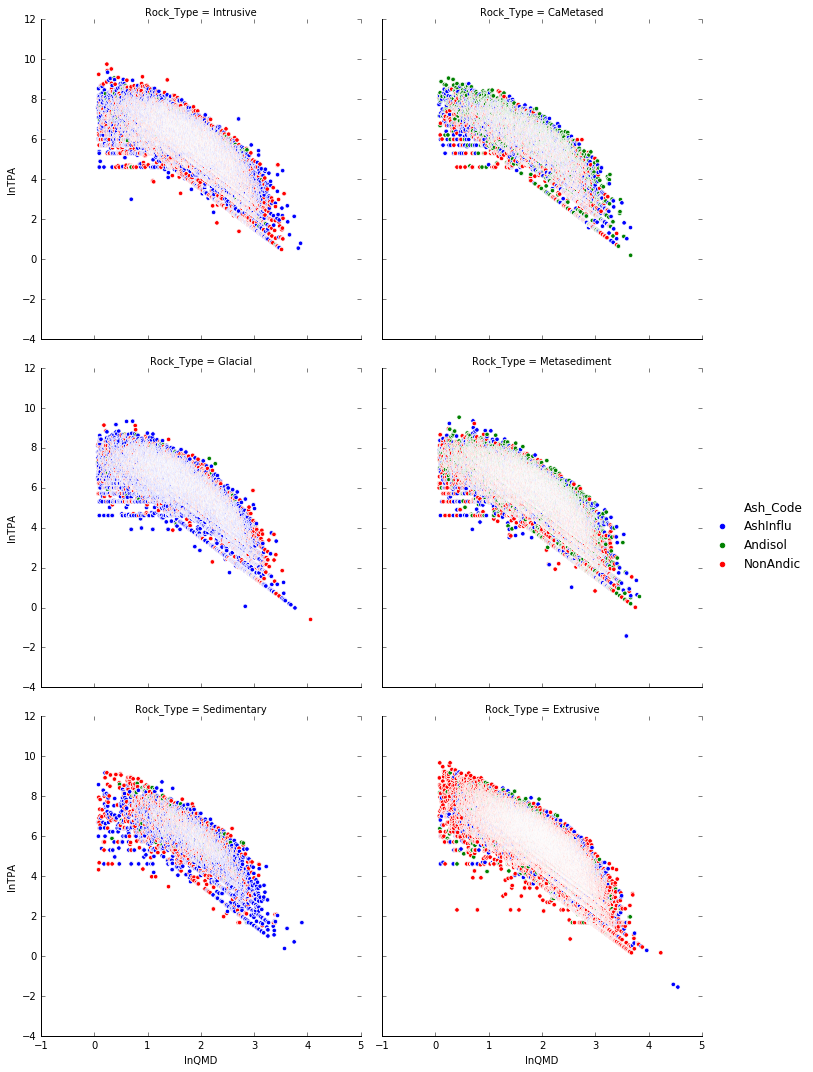

In [34]:
sns.relplot(x="lnQMD", y="lnTPA", hue="Ash_Code", col="Rock_Type", col_wrap=2, data=trees)

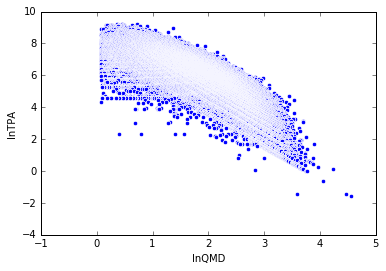

In [6]:
sns.scatterplot(x="lnQMD", y="lnTPA", data=trees)# hue="Rock_Type", col="Ash_Code"

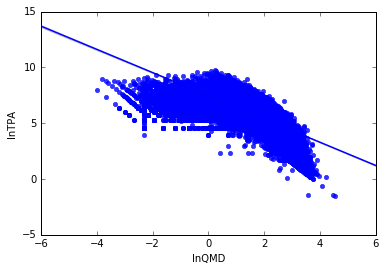

In [62]:
sns.regplot(x="lnQMD", y="lnTPA", data=trees)

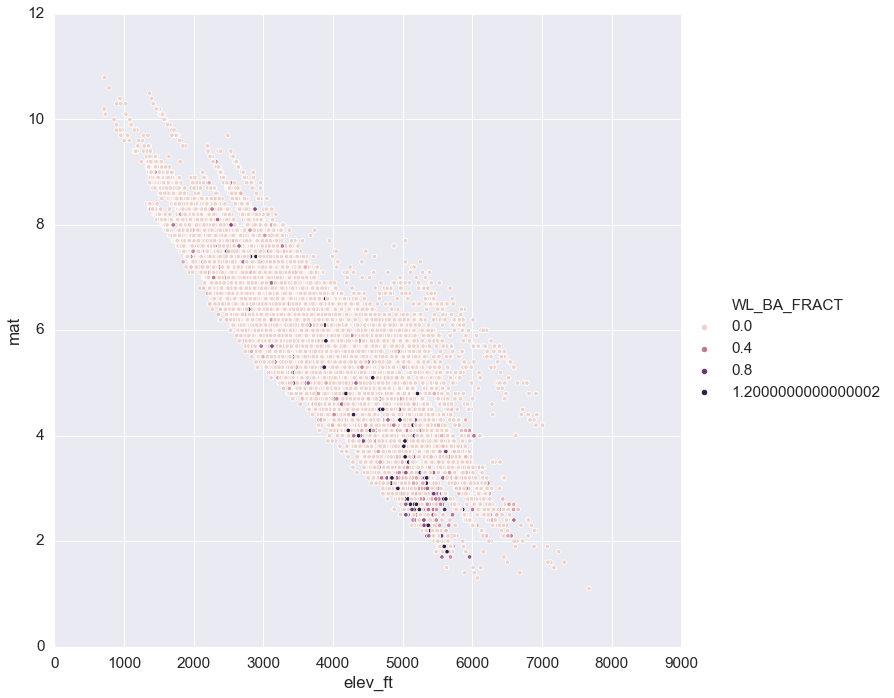

In [15]:
sns.relplot(x="elev_ft", y='mat', hue="WL_BA_FRACT", height=10, data=trees)

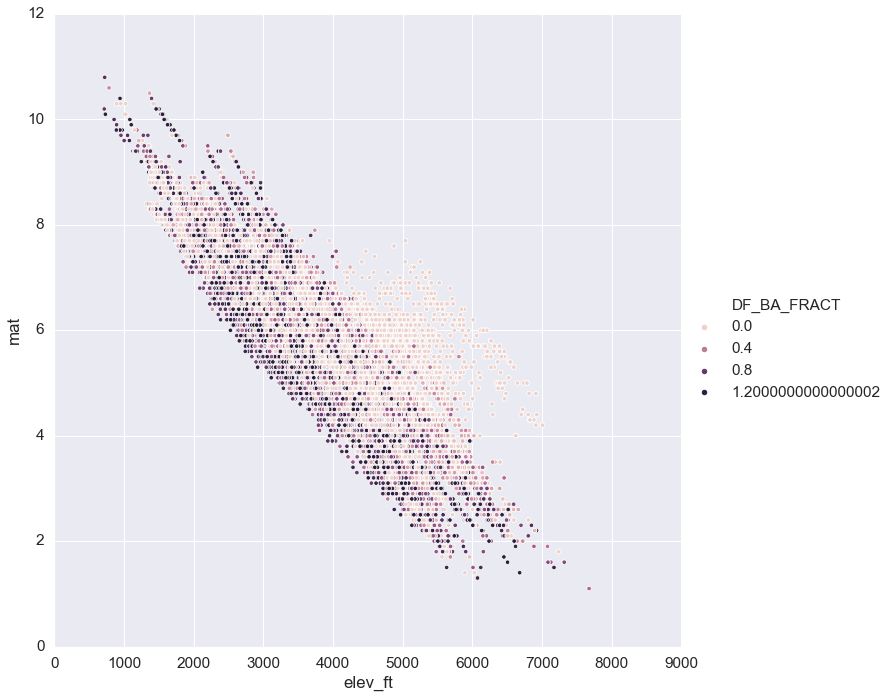

In [16]:
sns.relplot(x="elev_ft", y='mat', hue="DF_BA_FRACT", height=10, data=trees)

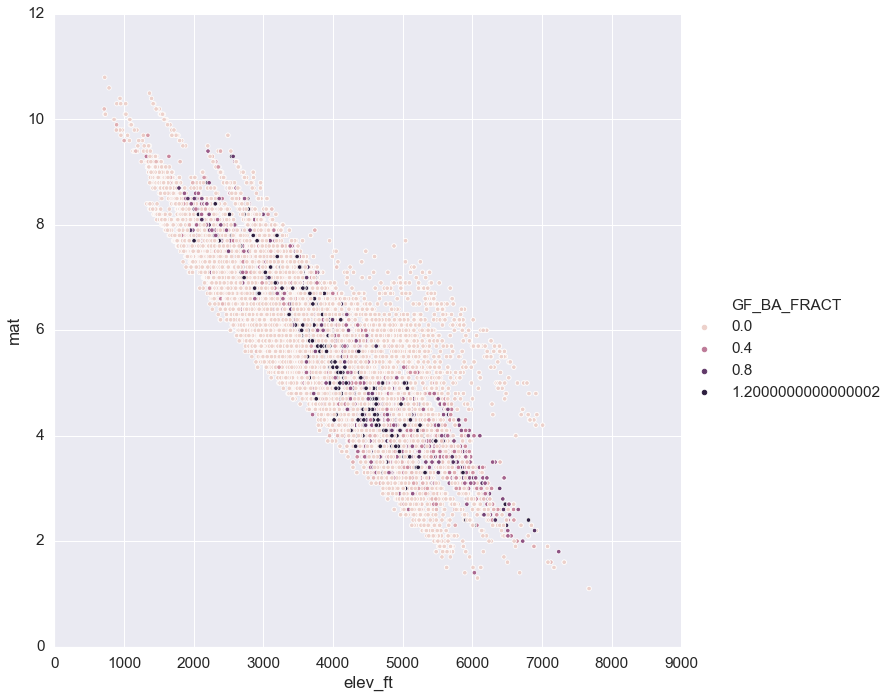

In [17]:
sns.relplot(x="elev_ft", y='mat', hue="GF_BA_FRACT", height=10, data=trees)

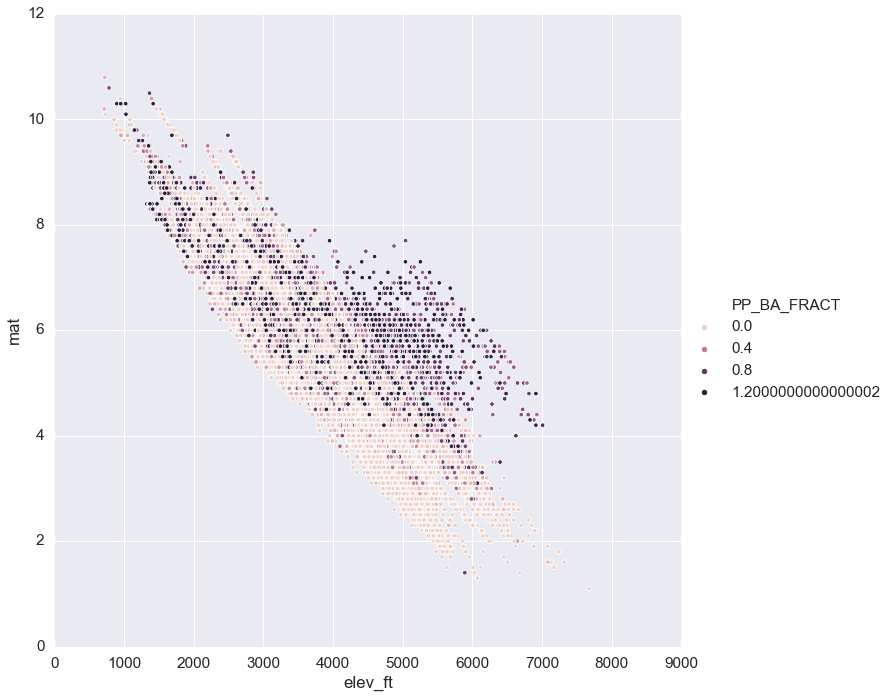

In [18]:
sns.relplot(x="elev_ft", y='mat', hue="PP_BA_FRACT", height=10, data=trees)

In [267]:
mod = smf.quantreg('lnTPH ~ lnQMDcm', trees, groups=trees["Ash_Code"])  #lnQMDcm
res = mod.fit(q=.5) #, vcov='robust', kernal='epa', bandwidth='hsheather'
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  lnTPH   Pseudo R-squared:               0.3829
Model:                       QuantReg   Bandwidth:                     0.09308
Method:                 Least Squares   Sparsity:                        2.154
Date:                Wed, 21 Nov 2018   No. Observations:                92386
Time:                        10:16:46   Df Residuals:                    92384
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.1635      0.015    748.507      0.000      11.134      11.193
lnQMDcm       -1.6210      0.005   -313.338      0.000      -1.631      -1.611


In [268]:
quantiles = np.arange(.95, .99, .01)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['lnQMDcm']] + \
            res.conf_int().loc['lnQMDcm'].tolist()
    
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

ols = smf.ols('lnTPH ~ lnQMDcm', trees).fit()
ols_ci = ols.conf_int().loc['lnQMDcm'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['lnQMDcm'],
           lb = ols_ci[0],
           ub = ols_ci[1])

print(models)
print(ols)

      q          a         b        lb        ub
0  0.95  12.149182 -1.580227 -1.587096 -1.573358
1  0.96  12.201068 -1.579904 -1.586958 -1.572850
2  0.97  12.262594 -1.579376 -1.586837 -1.571916
3  0.98  12.367274 -1.587021 -1.595094 -1.578948
4  0.99  12.506766 -1.595745 -1.604812 -1.586678
{'a': 11.062999725583264, 'b': -1.6269061507989382, 'lb': -1.6351082889892656, 'ub': -1.6187040126086107}


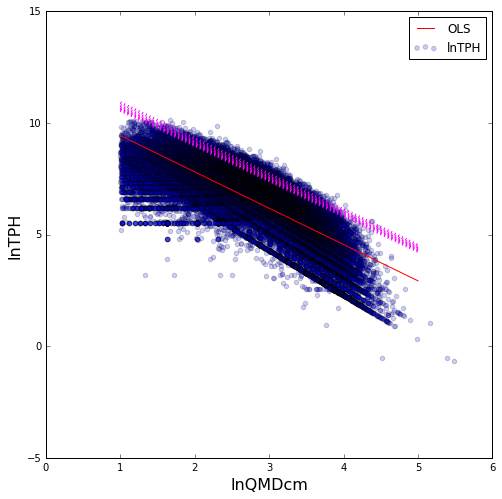

In [272]:
x = np.arange(trees.lnQMDcm.min(), trees.lnQMDcm.max(), .5)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(8,8))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', linewidth='3', color='magenta')
    
y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(trees.lnQMDcm, trees.lnTPH, alpha=.2)
ax.set_xlim((0, 6))
ax.set_ylim((-5, 15))
legend = ax.legend()
ax.set_xlabel('lnQMDcm', fontsize=16)
ax.set_ylabel('lnTPH', fontsize=16);

In [273]:
treeQ=trees

In [276]:
treeQ.head()

Stand_ID  Latitude  Longitude     Rock_Type  Ash_Code  StandBA  StandQMD  \
0  45_510942   47.5803   -116.280  Metasediment  NonAndic   234.52    2.0736   
1  24_213935   45.1997   -118.540     Extrusive  NonAndic   112.19    1.4384   
2  24_220620   46.9217   -121.130     Extrusive  AshInflu   131.46    1.5616   
3  24_111633   44.6467   -118.893   Sedimentary  NonAndic    84.14    1.2677   
4  24_207621   43.7195   -121.096     Extrusive   Andisol    90.86    1.3195   

          SDI        SDI_m     lnQMD     QMDcm   lnQMDcm  StandTPA     lnTPA  \
0  800.467308  1977.994742  0.729286  5.266944  1.661450  10000.00  9.210340   
1  442.488600  1093.411456  0.363531  3.653536  1.295695   9942.72  9.204596   
2  501.872976  1240.153218  0.445711  3.966464  1.377875   9883.58  9.198630   
3  348.816013   861.941809  0.237204  3.219958  1.169368   9599.64  9.169481   
4  370.762236   916.172024  0.277253  3.351530  1.209417   9568.38  9.166219   

       StandTPH      lnTPH  Aspect  Slope  elev_ft  mat   map  gsp  mtcm  \
0  24710.500000  10.114984     125     27  2969.16  6.8   911  306  -3.4   
1  24568.958256  10.109239     300      5  4820.38  4.6   749  246  -5.1   
2  24422.820359  10.103273     179     22  3973.40  4.5  1229  281  -4.1   
3  23721.190422  10.074124      52     20  5130.60  4.1   551  202  -5.5   
4  23643.945399  10.070862     178      5  5689.05  5.1   353  127  -3.4   

   mtwm  ffp   dd5  gsdd5  d100  dd0  smrsprpb     sdi      adi  tan_slope  \
0  17.8  115  1683   1227   119  453      0.54  5.5000  1.84742       0.27   
1  15.1   72  1179    653   143  659      0.43  4.7927  1.57410       0.05   
2  14.4   91  1095    720   146  615      0.40  3.8968  0.89097       0.22   
3  14.3   39  1070    350   146  711      0.51  5.2970  1.94192       0.20   
4  15.3   53  1211    548   141  545      0.67  9.5354  3.43059       0.05   

   cos_aspect  tan_slope_cos_aspect  sin_aspect  tan_slope_sin_aspect  \
0   -0.573576             -0.154866    0.819152              0.221171   
1    0.500000              0.025000   -0.866025             -0.043301   
2   -0.999848             -0.219966    0.017452              0.003840   
3    0.615661              0.123132    0.788011              0.157602   
4   -0.999391             -0.049970    0.034899              0.001745   

   DF_BA_FRACT  GF_BA_FRACT  PP_BA_FRACT  WL_BA_FRACT  Other_BA_FRACT  \
0      0.00000      0.47445      0.00000      0.00000         0.52555   
1      0.18401      0.58141      0.00001      0.14516         0.08941   
2      0.21670      0.13149      0.00000      0.13797         0.51384   
3      0.21098      0.47165      0.04678      0.14297         0.12762   
4      0.00000      0.00000      0.97332      0.00000         0.02668   

   cluster     maxSDI  
0        1   9.855515  
1        0  10.439166  
2        0  10.308029  
3        0  10.640752  
4        0  10.576845

## Logistic Regression

In [2]:
sdimax = pd.read_excel("C:\Users\heid4253\Documents\FinalProject\ProjecttreesCleanX_SDI.xlsx")

In [3]:
sdimax.head()

Stand_ID  Latitude  Longitude     Rock_Type  Ash_Code  StandBA  StandQMD  \
0  45_510942   47.5803   -116.280  Metasediment  NonAndic   234.52    2.0736   
1  24_213935   45.1997   -118.540     Extrusive  NonAndic   112.19    1.4384   
2  24_220620   46.9217   -121.130     Extrusive  AshInflu   131.46    1.5616   
3  24_111633   44.6467   -118.893   Sedimentary  NonAndic    84.14    1.2677   
4  24_207621   43.7195   -121.096     Extrusive   Andisol    90.86    1.3195   

          SDI        SDI_m     lnQMD      ...        tan_slope_sin_aspect  \
0  800.467308  1977.994742  0.729286      ...                    0.221171   
1  442.488600  1093.411456  0.363531      ...                   -0.043301   
2  501.872976  1240.153218  0.445711      ...                    0.003840   
3  348.816013   861.941809  0.237204      ...                    0.157602   
4  370.762236   916.172024  0.277253      ...                    0.001745   

   DF_BA_FRACT  GF_BA_FRACT  PP_BA_FRACT  WL_BA_FRACT  Other_BA_FRACT  \
0      0.00000      0.47445      0.00000      0.00000         0.52555   
1      0.18401      0.58141      0.00001      0.14516         0.08941   
2      0.21670      0.13149      0.00000      0.13797         0.51384   
3      0.21098      0.47165      0.04678      0.14297         0.12762   
4      0.00000      0.00000      0.97332      0.00000         0.02668   

          SDI99  Above_Below99         SDI95  Above_Below95  
0  19063.198550          Above  13680.317005          Above  
1  34172.155986          Below  24384.160514          Above  
2  29972.297875          Below  21414.567514          Above  
3  41804.211064          Below  29771.731477          Below  
4  39216.189437          Below  27945.980803          Below  

[5 rows x 46 columns]

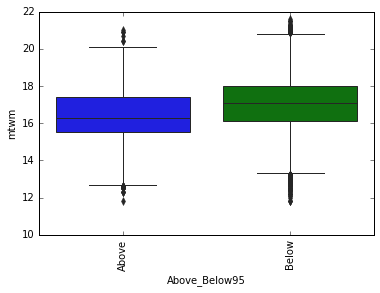

In [23]:
s=sns.boxplot(x="Above_Below95", y="mtwm",data=sdimax, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

In [24]:
treesdimax=pd.get_dummies(sdimax, columns=["Rock_Type", "Ash_Code"])
treesdimax=treesdimax.drop(['Stand_ID','StandBA','StandQMD','QMDcm','lnQMDcm','StandTPA','StandTPH','lnTPH','SDI','SDI_m','SDI99','Above_Below99','lnQMD','lnTPA'], axis=1)

In [26]:
treesdimax['Above_Below95'] = treesdimax.Above_Below95.map({'Below':0,'Above':1})

In [27]:
treesdimax.head()

Latitude  Longitude  Aspect  Slope  elev_ft  mat   map  gsp  mtcm  mtwm  \
0   47.5803   -116.280     125     27  2969.16  6.8   911  306  -3.4  17.8   
1   45.1997   -118.540     300      5  4820.38  4.6   749  246  -5.1  15.1   
2   46.9217   -121.130     179     22  3973.40  4.5  1229  281  -4.1  14.4   
3   44.6467   -118.893      52     20  5130.60  4.1   551  202  -5.5  14.3   
4   43.7195   -121.096     178      5  5689.05  5.1   353  127  -3.4  15.3   

         ...          Above_Below95  Rock_Type_CaMetased  Rock_Type_Extrusive  \
0        ...                      1                    0                    0   
1        ...                      1                    0                    1   
2        ...                      1                    0                    1   
3        ...                      0                    0                    0   
4        ...                      0                    0                    1   

   Rock_Type_Glacial  Rock_Type_Intrusive  Rock_Type_Metasediment  \
0                  0                    0                       1   
1                  0                    0                       0   
2                  0                    0                       0   
3                  0                    0                       0   
4                  0                    0                       0   

   Rock_Type_Sedimentary  Ash_Code_Andisol  Ash_Code_AshInflu  \
0                      0                 0                  0   
1                      0                 0                  0   
2                      0                 0                  1   
3                      1                 0                  0   
4                      0                 1                  0   

   Ash_Code_NonAndic  
0                  1  
1                  1  
2                  0  
3                  1  
4                  0  

[5 rows x 39 columns]

In [28]:
treesdimax['Above_Below95'].value_counts()

0    87766
1     4620
Name: Above_Below95, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X=treesdimax.drop('Above_Below95',axis=1)
y=treesdimax.Above_Below95
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print X_train.shape
print X_test.shape

(69289, 38)
(23097, 38)


In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.95


In [32]:
y_pred_class = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print ('Accuracy Score: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print ('AUC: {:.5f}'.format(metrics.roc_auc_score(y_test, y_pred_prob)))
print metrics.confusion_matrix(y_test, y_pred_class)

Accuracy Score: 0.94878
AUC: 0.80213
[[21867    27]
 [ 1156    47]]


Text(0,0.5,'True Positive Rate (Sensitivity)')

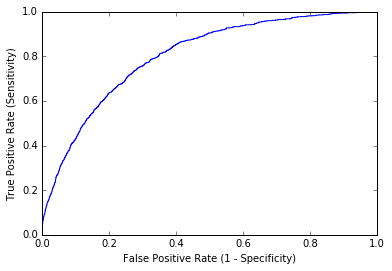

In [33]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [315]:
treesdimax.dtypes

Latitude                  float64
Longitude                 float64
Aspect                      int64
Slope                       int64
elev_ft                   float64
mat                       float64
map                         int64
gsp                         int64
mtcm                      float64
mtwm                      float64
ffp                         int64
dd5                         int64
gsdd5                       int64
d100                        int64
dd0                         int64
smrsprpb                  float64
sdi                       float64
adi                       float64
tan_slope                 float64
cos_aspect                float64
tan_slope_cos_aspect      float64
sin_aspect                float64
tan_slope_sin_aspect      float64
DF_BA_FRACT               float64
GF_BA_FRACT               float64
PP_BA_FRACT               float64
WL_BA_FRACT               float64
Other_BA_FRACT            float64
Above_Below                 int64
Rock_Type_CaMe

In [34]:
from sklearn.ensemble import RandomForestClassifier
fclf=RandomForestClassifier().fit(X_train,y_train)
print('Accuracy of Decision Forest classifier on training set: {:.2f}'
     .format(fclf.score(X_train, y_train)))
print('Accuracy of Decision Forest classifier on test set: {:.2f}'
     .format(fclf.score(X_test, y_test)))

Accuracy of Decision Forest classifier on training set: 0.99
Accuracy of Decision Forest classifier on test set: 0.95


In [35]:
y_pred_class = fclf.predict(X_test)
y_pred_prob = fclf.predict_proba(X_test)[:, 1]
print ('Accuracy Score: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print ('AUC: {:.5f}'.format(metrics.roc_auc_score(y_test, y_pred_prob)))
print metrics.confusion_matrix(y_test, y_pred_class)

Accuracy Score: 0.94878
AUC: 0.79658
[[21867    27]
 [ 1156    47]]


Text(0,0.5,'True Positive Rate (Sensitivity)')

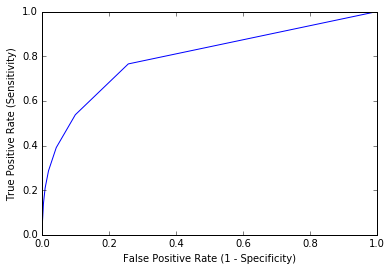

In [36]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [61]:
from sklearn.ensemble import AdaBoostClassifier
adrfc=AdaBoostClassifier(RandomForestClassifier()).fit(X_train, y_train)
print('Accuracy of Rand Forest classifier on training set: {:.2f}'
     .format(adrfc.score(X_train, y_train)))
print('Accuracy of Rand Forest classifier on test set: {:.2f}'
     .format(adrfc.score(X_test, y_test)))

Accuracy of Rand Forest classifier on training set: 1.00
Accuracy of Rand Forest classifier on test set: 0.95


In [62]:
y_pred_class = adrfc.predict(X_test)
y_pred_prob = adrfc.predict_proba(X_test)[:, 1]
print ('Accuracy Score: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print ('AUC: {:.5f}'.format(metrics.roc_auc_score(y_test, y_pred_prob)))
print metrics.confusion_matrix(y_test, y_pred_class)
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
print 'True Positives:', TP
print 'True Negatives:', TN
print 'False Positives:', FP
print 'False Negatives:', FN

Accuracy Score: 0.95246
AUC: 0.86012
[[21752   142]
 [  956   247]]
True Positives: 247
True Negatives: 21752
False Positives: 142
False Negatives: 956


Text(0,0.5,'True Positive Rate (Sensitivity)')

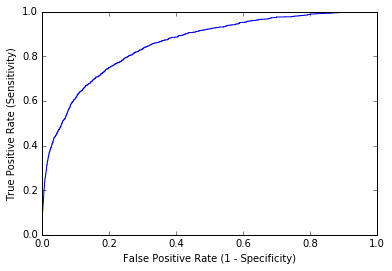

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

Text(0,0.5,'Cross-Validated Accuracy')

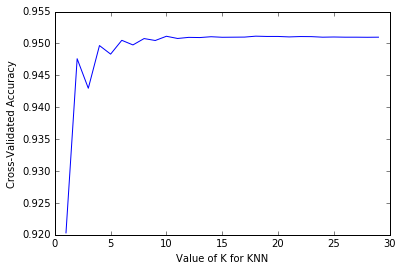

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_range = range(1,30)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())   
    
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [48]:
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier(n_neighbors=10)
nn.fit(X_train, y_train)
print('Accuracy of Naive Bayes classifier on training set: {:.2f}'
     .format(nn.score(X_train, y_train)))
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'
     .format(nn.score(X_test, y_test)))

Accuracy of Naive Bayes classifier on training set: 0.95
Accuracy of Naive Bayes classifier on test set: 0.95


In [39]:
y_pred_class = nn.predict(X_test)
y_pred_prob = nn.predict_proba(X_test)[:, 1]
print ('Accuracy Score: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print ('AUC: {:.5f}'.format(metrics.roc_auc_score(y_test, y_pred_prob)))
print metrics.confusion_matrix(y_test, y_pred_class)

Accuracy Score: 0.94839
AUC: 0.69410
[[21876    18]
 [ 1174    29]]


In [46]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of Naive Bayes classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of Naive Bayes classifier on training set: 0.82
Accuracy of Naive Bayes classifier on test set: 0.82


In [47]:
y_pred_class = gnb.predict(X_test)
y_pred_prob = gnb.predict_proba(X_test)[:, 1]
print ('Accuracy Score: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print ('AUC: {:.5f}'.format(metrics.roc_auc_score(y_test, y_pred_prob)))
print metrics.confusion_matrix(y_test, y_pred_class)

Accuracy Score: 0.81799
AUC: 0.75723
[[18298  3596]
 [  608   595]]


In [52]:
from sklearn.tree import DecisionTreeClassifier
dtclf=DecisionTreeClassifier().fit(X_train,y_train)
print('Accuracy of Decision Forest classifier on training set: {:.2f}'
     .format(dtclf.score(X_train, y_train)))
print('Accuracy of Decision Forest classifier on test set: {:.2f}'
     .format(dtclf.score(X_test, y_test)))

Accuracy of Decision Forest classifier on training set: 1.00
Accuracy of Decision Forest classifier on test set: 0.92


In [53]:
y_pred_class = dtclf.predict(X_test)
y_pred_prob = dtclf.predict_proba(X_test)[:, 1]
print ('Accuracy Score: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print ('AUC: {:.5f}'.format(metrics.roc_auc_score(y_test, y_pred_prob)))
print metrics.confusion_matrix(y_test, y_pred_class)

Accuracy Score: 0.92263
AUC: 0.62728
[[20952   942]
 [  845   358]]


In [54]:
adtclf=AdaBoostClassifier(DecisionTreeClassifier()).fit(X_train,y_train)
print('Accuracy of Decision Forest classifier on training set: {:.2f}'
     .format(adtclf.score(X_train, y_train)))
print('Accuracy of Decision Forest classifier on test set: {:.2f}'
     .format(adtclf.score(X_test, y_test)))

Accuracy of Decision Forest classifier on training set: 1.00
Accuracy of Decision Forest classifier on test set: 0.92


In [55]:
y_pred_class = adtclf.predict(X_test)
y_pred_prob = adtclf.predict_proba(X_test)[:, 1]
print ('Accuracy Score: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print ('AUC: {:.5f}'.format(metrics.roc_auc_score(y_test, y_pred_prob)))
print metrics.confusion_matrix(y_test, y_pred_class)

Accuracy Score: 0.92220
AUC: 0.62705
[[20942   952]
 [  845   358]]


In [50]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(solver='lbfgs')
mlpc.fit(X_train,y_train)
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(mlpc.score(X_train, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(mlpc.score(X_test, y_test)))

Accuracy of NN classifier on training set: 0.95
Accuracy of NN classifier on test set: 0.95


In [51]:
y_pred_class = mlpc.predict(X_test)
y_pred_prob = mlpc.predict_proba(X_test)[:, 1]
print ('Accuracy Score: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print ('AUC: {:.5f}'.format(metrics.roc_auc_score(y_test, y_pred_prob)))
print metrics.confusion_matrix(y_test, y_pred_class)

Accuracy Score: 0.94792
AUC: 0.43518
[[21894     0]
 [ 1203     0]]


## Clustering Analysis

In [ ]:
sdi_clust = pd.read_excel("C:\Users\heid4253\Documents\FinalProject\ProjecttreesCleanX_SDI.xlsx")

In [2]:
tree_clust=pd.get_dummies(trees, columns=["Rock_Type", "Ash_Code"])

In [3]:
tree_clust=tree_clust.drop(['Stand_ID','QMDcm','lnQMDcm','StandTPH','lnTPH','SDI','SDI_m','Slope','Aspect'], axis=1) #'StandBA','StandQMD', 'StandTPA',

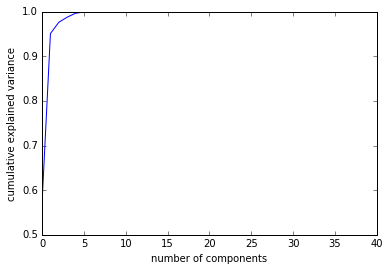

In [7]:
from sklearn.decomposition import PCA
pca = PCA().fit(tree_clust)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [8]:
pca = PCA(n_components=5)
pca.fit(tree_clust)
n_components=5
pcadf=pd.DataFrame(pca.transform(tree_clust), columns=['PCA%i' % i for i in range(n_components)], index=tree_clust.index)

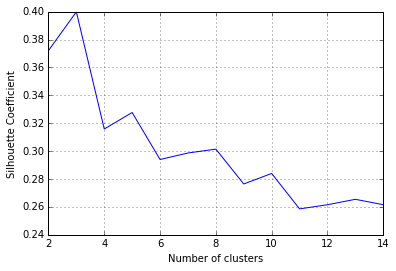

In [18]:
from sklearn import metrics
from sklearn.cluster import KMeans

k_range = range(2, 15)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(tree_clust)
    scores.append(metrics.silhouette_score(tree_clust, km.labels_, sample_size=10000))

optimal_k = k_range[scores.index(max(scores))]
#print "The optimal number of clusters is %d" % optimal_k    
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True) 

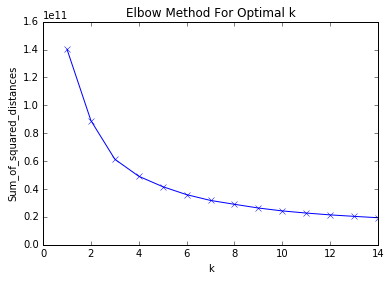

In [19]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(tree_clust)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [20]:
from sklearn import metrics
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3, random_state=1).fit(tree_clust)
tree_clust['cluster'] = kmeans.labels_

In [21]:
tree_clust.head()

Latitude  Longitude  StandBA  StandQMD     lnQMD  StandTPA     lnTPA  \
0   47.5803   -116.280   234.52    2.0736  0.729286  10000.00  9.210340   
1   45.1997   -118.540   112.19    1.4384  0.363531   9942.72  9.204596   
2   46.9217   -121.130   131.46    1.5616  0.445711   9883.58  9.198630   
3   44.6467   -118.893    84.14    1.2677  0.237204   9599.64  9.169481   
4   43.7195   -121.096    90.86    1.3195  0.277253   9568.38  9.166219   

   elev_ft  mat   map   ...     Rock_Type_CaMetased  Rock_Type_Extrusive  \
0  2969.16  6.8   911   ...                       0                    0   
1  4820.38  4.6   749   ...                       0                    1   
2  3973.40  4.5  1229   ...                       0                    1   
3  5130.60  4.1   551   ...                       0                    0   
4  5689.05  5.1   353   ...                       0                    1   

   Rock_Type_Glacial  Rock_Type_Intrusive  Rock_Type_Metasediment  \
0                  0                    0                       1   
1                  0                    0                       0   
2                  0                    0                       0   
3                  0                    0                       0   
4                  0                    0                       0   

   Rock_Type_Sedimentary  Ash_Code_Andisol  Ash_Code_AshInflu  \
0                      0                 0                  0   
1                      0                 0                  0   
2                      0                 0                  1   
3                      1                 0                  0   
4                      0                 1                  0   

   Ash_Code_NonAndic  cluster  
0                  1        2  
1                  1        2  
2                  0        2  
3                  1        2  
4                  0        2  

[5 rows x 41 columns]

In [37]:
tree_clust['cluster'].value_counts()

1    48696
0    35900
2     7790
Name: cluster, dtype: int64

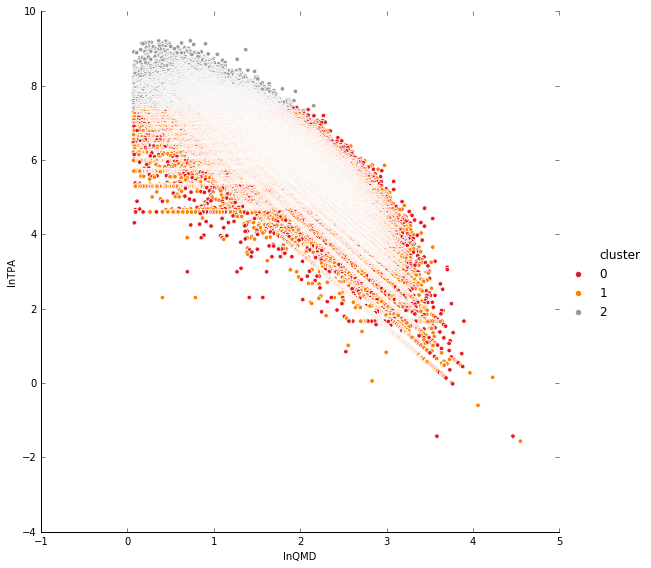

In [34]:
fig2=sns.relplot(x="lnQMD", y="lnTPA", data=tree_clust, palette='Set1', hue="cluster", height=8) #legend='full',palette= 'Set2',

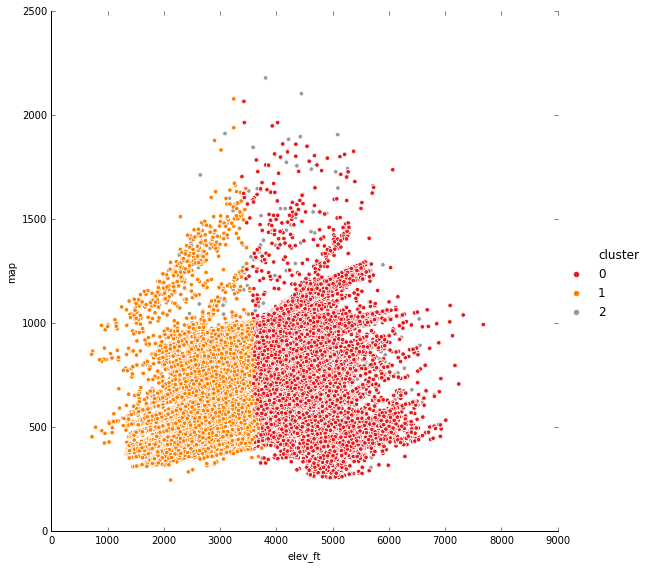

In [36]:
fig3=sns.relplot(x="elev_ft", y="map", data=tree_clust, palette='Set1', hue="cluster", height=8)

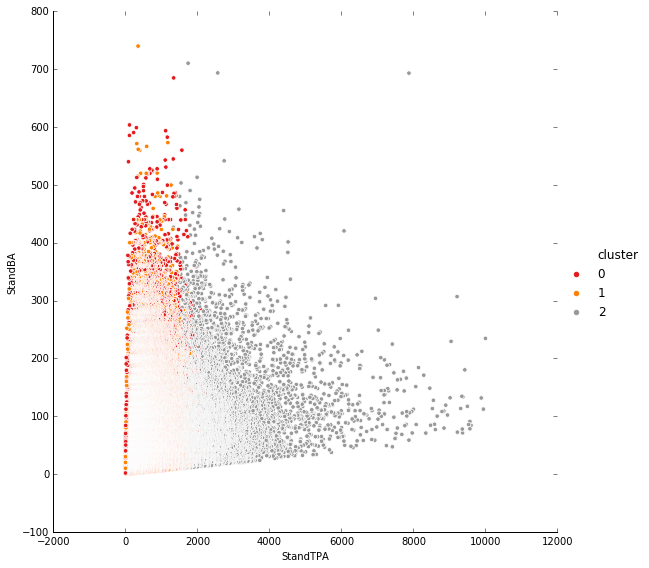

In [40]:
fig4=sns.relplot(x="StandTPA", y="StandBA", data=tree_clust, palette='Set1', hue="cluster", height=8)